In [1]:
from kissim.encoding import FingerprintGenerator
from kissim.comparison import FingerprintDistanceGenerator
from pathlib import Path
from opencadd.databases.klifs import setup_remote
from src.evaluation.ligand_vs_kinase_evaluator import LigandVsKinaseEvaluator
from src.paths import PATH_RESULTS
import pandas as pd
from src import data
import matplotlib.pyplot as plt


DATA = PATH_RESULTS / "dfg_in"
SPECIES = "Human"
DFG_CONFORMATION = "in"
RESOLUTION_MAX = 4

HERE = Path(_dh[-1])  # noqa: F821
RESULTS = PATH_RESULTS / "dfg_in"

In [2]:
%%time
fingerprint_distance_file = DATA / "fingerprint_distances.csv.bz2"
fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv(fingerprint_distance_file)

CPU times: user 12.8 s, sys: 349 ms, total: 13.1 s
Wall time: 13.1 s


In [3]:
fingerprint_distance_generator

In [4]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../data/processed/"
structure_klifs_ids = pd.read_csv(
    DATA / "structure_klifs_ids_all.txt", squeeze=True, header=None
).to_list()
print(f"Number of structures: {len(structure_klifs_ids)}")
remote = setup_remote()
structures = remote.structures.by_structure_klifs_id(structure_klifs_ids)
pd.set_option("display.max_columns", 50)
structures

Number of structures: 4690


,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
0,1,3dko,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGA_EFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,IHZ,-,1,0,<NA>,<NA>,out,in,2.00,8.1,3,7,0.944,2.254,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,True,False,False,0.000000,0.000000,0.000000,<NA>,False
1,4,2rei,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGAGEFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,-,-,0,0,<NA>,<NA>,in,in,1.60,7.6,1,0,0.784,2.093,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.746799,63.102798,77.154900,<NA>,False
2,8,3miy,-,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,B49,-,5,0,<NA>,<NA>,in,in,1.67,6.4,4,0,0.845,2.052,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.728800,53.692200,46.623100,<NA>,False
3,9,4m0y,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,M0Y,M0Y,6,6,<NA>,<NA>,in,out,1.70,8.0,0,0,0.817,2.200,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.555901,59.358200,69.081596,<NA>,False
4,11,3qgw,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,PQC,-,8,0,<NA>,<NA>,in,out,2.10,7.2,2,0,0.829,2.126,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.781099,58.850201,57.749901,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,13855,7ree,A,A,Human,436,JAK2,<NA>,<NA>,<NA>,QQLGKGNFGSVEMVAVKKLDFEREIEILKSLQDNIVKYKGVKLIME...,4LY,-,4085,0,<NA>,<NA>,in,in,1.38,8.0,0,0,0.783,2.093,<NA>,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,15.880600,50.247898,39.763199,<NA>,False
4686,13857,7n3u,-,A,Human,333,Wee1,<NA>,<NA>,<NA>,EKIGSGEFGSVFKYAIKRSNALREVYAHAVLGSHVVRYFSALIQNE...,05J,-,4086,0,<NA>,<NA>,in,in,2.65,8.0,0,0,0.777,2.116,<NA>,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,19.308500,63.620499,52.645802,<NA>,False
4687,13862,7ni6,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,AGS,-,38,0,<NA>,<NA>,in,in,2.80,7.2,0,0,1.540,3.176,<NA>,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.298500,73.256500,84.482002,<NA>,False
4688,13863,7ni5,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,UF8,-,4089,0,<NA>,<NA>,in,in,2.78,7.2,0,0,1.547,3.174,<NA>,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,20.552401,72.915901,83.977898,<NA>,False


In [5]:
structures_apo = structures[structures["ligand.expo_id"] == "-"]
structures_apo = structures_apo[structures_apo["ligand_allosteric.expo_id"] == "-"]
#get number of unique kinase.klifs_name	
print(structures_apo["kinase.klifs_name"].nunique(),structures["kinase.klifs_name"].nunique())
print(structures_apo['structure.dfg'].value_counts())
structures_apo_dfg_in = structures_apo[structures_apo["structure.dfg"] == "in"]
print(structures_apo_dfg_in['structure.ac_helix'].value_counts())
structures_apo_dfg_in_ac_in = structures_apo_dfg_in[structures_apo_dfg_in["structure.ac_helix"] == "in"]
structures_apo_dfg_in_ac_in
#keep one structure per kinase.klifs_name; the one with highest structure.qualityscore
structures_apo_dfg_in_ac_in = structures_apo_dfg_in_ac_in.sort_values("structure.qualityscore", ascending=False)
structures_apo_dfg_in_ac_in_unique = structures_apo_dfg_in_ac_in.drop_duplicates("kinase.klifs_name")
structures_apo_dfg_in_ac_in_unique
#get klifs_ids of these structures
klifs_ids = structures_apo_dfg_in_ac_in_unique["structure.klifs_id"].to_list()
#generator with these ids

144 279
in          387
out          29
out-like     29
Name: structure.dfg, dtype: Int64
in     340
out     47
Name: structure.ac_helix, dtype: Int64


In [6]:
fingerprint_distance_generator = FingerprintDistanceGenerator.from_structure_klifs_ids(klifs_ids, remote, n_cores=16)
fingerprint_distance_generator

Calculate pairwise fingerprint distance:   0%|          | 0/5460 [00:00<?, ?it/s]

Calculate pairwise fingerprint coverage:   0%|          | 0/5460 [00:00<?, ?it/s]

In [7]:
distance_matrix_apo_only = fingerprint_distance_generator.kinase_distance_matrix(by="minimum", coverage_min=0.8)
distance_matrix_apo_only
distance_matrix_path_apo_only = Path("distance_matrix_apo_only.csv")
distance_matrix_apo_only.to_csv(distance_matrix_path_apo_only)


Changed ligand names (unknown names may be discarded - see function docstring):
           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25      

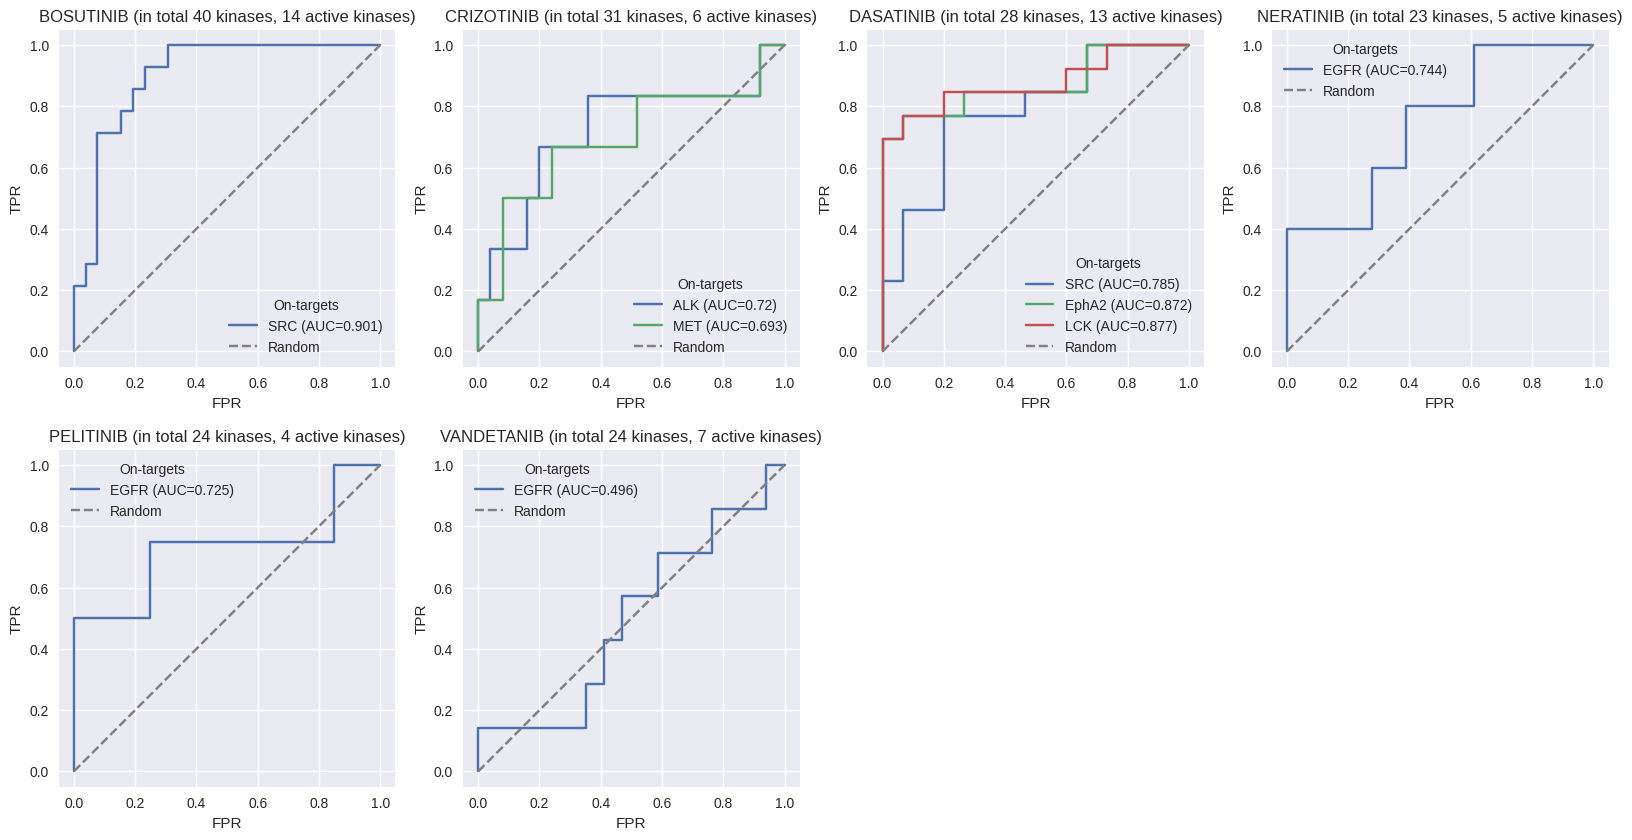

In [8]:
KINASE_DISTANCES_METHOD = "kissim"
KINASE_ACTIVITY_CUTOFF = 100
KINASE_ACTIVITY_MAX = True
MIN_N_SHARED_KINASES = 10
MIN_N_SHARED_ACTIVE_KINASES = 3
ligand_profiling_method = 'karaman-davis'


# Kinase-ligand profiling dataset
profiling_df = data.profiling.load(
    ligand_profiling_method, pkidb_ligands=True, fda_approved=False
)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)
evaluator = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_apo_only,
)
distance_matrix_path_apo_only.unlink()  # Remove file again!
aucs = evaluator.plot_roc_curves()
plt.show()

In [9]:
aucs_one_apo_structure = aucs
aucs_one_apo_structure

{'Bosutinib-SRC': 0.9010989010989011,
 'Crizotinib-ALK': 0.72,
 'Crizotinib-MET': 0.6933333333333332,
 'Dasatinib-SRC': 0.7846153846153847,
 'Dasatinib-EphA2': 0.8717948717948718,
 'Dasatinib-LCK': 0.8769230769230769,
 'Neratinib-EGFR': 0.7444444444444445,
 'Pelitinib-EGFR': 0.725,
 'Vandetanib-EGFR': 0.49579831932773105}

In [10]:
distance_to_egfr = distance_matrix_apo_only['EGFR'].sort_values(ascending=True).index.tolist()
distance_to_egfr

['EGFR',
 'ErbB4',
 'EphB1',
 'SYK',
 'ALK',
 'ACK',
 'EphA2',
 'EphA3',
 'FGFR2',
 'MST1',
 'LCK',
 'EphB2',
 'SRC',
 'EphA7',
 'SLK',
 'EphA5',
 'EphB4',
 'EphA8',
 'FGFR4',
 'INSR',
 'FGFR1',
 'MET',
 'IRAK4',
 'MST2',
 'CDC2',
 'PKG1',
 'AurA',
 'NIK',
 'BARK1',
 'Erk3',
 'MARK2',
 'CLK3',
 'MAP3K5',
 'MYT1',
 'MELK',
 'PAK1',
 'TNIK',
 'IRE1',
 'CaMK2a',
 'CDK9',
 'PKN1',
 'DYRK2',
 'PLK1',
 'PYK2',
 'Erk2',
 'MST3',
 'p38g',
 'PRP4',
 'PIM1',
 'CDK2',
 'CDK5',
 'PKR',
 'CK1a',
 'CK1e',
 'CHK1',
 'PKACa',
 'p38a',
 'MARK3',
 'TTBK1',
 'AKT1',
 'CDK8',
 'PKCi',
 'GSK3B',
 'BRAF',
 'DAPK1',
 'SRPK1',
 'CK1d',
 'TTK',
 'MSK1-b',
 'DAPK2',
 'PAK4',
 'p38d',
 'RSK3-b',
 'RIPK2',
 'DAPK3',
 'MAP2K7',
 'CASK',
 'DLK',
 'JNK3',
 'PAK6',
 'MLKL',
 'Erk5',
 'JNK1',
 'DCLK1',
 'VRK1',
 'MAPKAPK2',
 'CaMK2g',
 'RYK',
 'Haspin',
 'JAK1-b',
 'VRK2',
 'CK2a1',
 'IRAK3',
 'TTN',
 'RIOK2',
 'RIOK1',
 'TGFbR1',
 'PIK3C3',
 'PI4KB',
 'TGFbR2',
 'PI4K2A',
 'p110a',
 'ADCK3',
 'p110g',
 'Trb1']

In [11]:
profiling_df_Vatalanib = profiling_df['Vandetanib']
profiling_df_Vatalanib = profiling_df_Vatalanib.dropna()
print(len(profiling_df_Vatalanib))
apo_kinase_names = structures_apo_dfg_in_ac_in_unique["kinase.klifs_name"].to_list()
profiling_df_Vatalanib = profiling_df_Vatalanib[profiling_df_Vatalanib.index.isin(apo_kinase_names)]
print(len(profiling_df_Vatalanib))
profiling_df_Vatalanib = profiling_df_Vatalanib.sort_values(ascending=True)
profiling_df_Vatalanib_actives = profiling_df_Vatalanib[profiling_df_Vatalanib <= KINASE_ACTIVITY_CUTOFF]
print(len(profiling_df_Vatalanib_actives))
print(profiling_df_Vatalanib_actives)

#for each of these, print the distance to EGFR from distance_matrix_apo_only
klif_ids_all = []
for kinase in profiling_df_Vatalanib_actives.index:
    klifs_id = structures_apo_dfg_in_ac_in_unique[structures_apo_dfg_in_ac_in_unique["kinase.klifs_name"] == kinase]["structure.klifs_id"].values[0]
    print(kinase, distance_to_egfr.index(kinase),klifs_id)
    klif_ids_all.append(klifs_id)

105
24
7
RIPK2     4.6
EGFR      9.5
LCK      17.0
SRC      70.0
IRAK4    75.0
EphA8    91.0
SLK      95.0
Name: Vandetanib, dtype: float64
RIPK2 73 6185
EGFR 0 815
LCK 10 2263
SRC 12 967
IRAK4 22 1736
EphA8 17 1251
SLK 14 1836


In [12]:
import seaborn as sns
def plot_fingerprint_diff(fingerprints, pair, ax):
    """
    Plot fingerprint diff features.
    """

    fp1 = fingerprints.data[pair["structure.1"]]
    fp2 = fingerprints.data[pair["structure.2"]]
    fp_diff_physchem = (fp1.physicochemical.transpose() - fp2.physicochemical.transpose()).abs()
    fp_diff_distances = (fp1.distances.transpose() - fp2.distances.transpose()).abs()
    fp_diff = pd.concat([fp_diff_physchem, fp_diff_distances])

    # Column mean
    fp_diff_col_mean = fp_diff.mean(axis=0)
    fp_diff_col_mean.name = "$\O$"  # noqa: W605
    fp_diff = pd.concat([fp_diff, pd.DataFrame(fp_diff_col_mean).transpose()], axis=0)

    # Row mean
    fp_diff_row_mean = fp_diff.mean(axis=1)
    fp_diff_row_mean.name = "$\O$"  # noqa: W605
    fp_diff = pd.concat([fp_diff, pd.DataFrame(fp_diff_row_mean)], axis=1)
    sns.heatmap(
        fp_diff,
        cmap="Blues",
        ax=ax,
        vmin=0,
        vmax=1,
        xticklabels=range(1, 87),
        cbar_kws={"label": "KiSSim distance difference"},
    )
    xticklabels = [i if i % 2 == 0 else "" for i in range(1, 86)] + ["$\O$"]  # noqa: W605
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel("-".join(sorted([pair["kinase.1"], pair["kinase.2"]])))

In [13]:
%%time
from src.paths import PATH_RESULTS
DATA = PATH_RESULTS / "dfg_in"
fingerprints_file = DATA / "fingerprints_normalized.json"
fingerprints = FingerprintGenerator.from_json(fingerprints_file)
print(f"Number of fingerprints: {len(fingerprints.data)}")

Number of fingerprints: 4112
CPU times: user 743 ms, sys: 54.1 ms, total: 797 ms
Wall time: 805 ms


[structure.1          815
structure.2         6185
kinase.1            EGFR
kinase.2           RIPK2
distance        0.263907
bit_coverage    0.962667
Name: 1562, dtype: object, structure.1          815
structure.2         2263
kinase.1            EGFR
kinase.2             LCK
distance        0.174702
bit_coverage    0.994667
Name: 1608, dtype: object, structure.1          815
structure.2          967
kinase.1            EGFR
kinase.2             SRC
distance        0.178559
bit_coverage    0.993333
Name: 1597, dtype: object, structure.1          815
structure.2         1736
kinase.1            EGFR
kinase.2           IRAK4
distance        0.201893
bit_coverage       0.994
Name: 1589, dtype: object, structure.1          815
structure.2         1251
kinase.1            EGFR
kinase.2           EphA8
distance        0.186714
bit_coverage    0.992667
Name: 1591, dtype: object, structure.1          815
structure.2         1836
kinase.1            EGFR
kinase.2             SLK
distance      

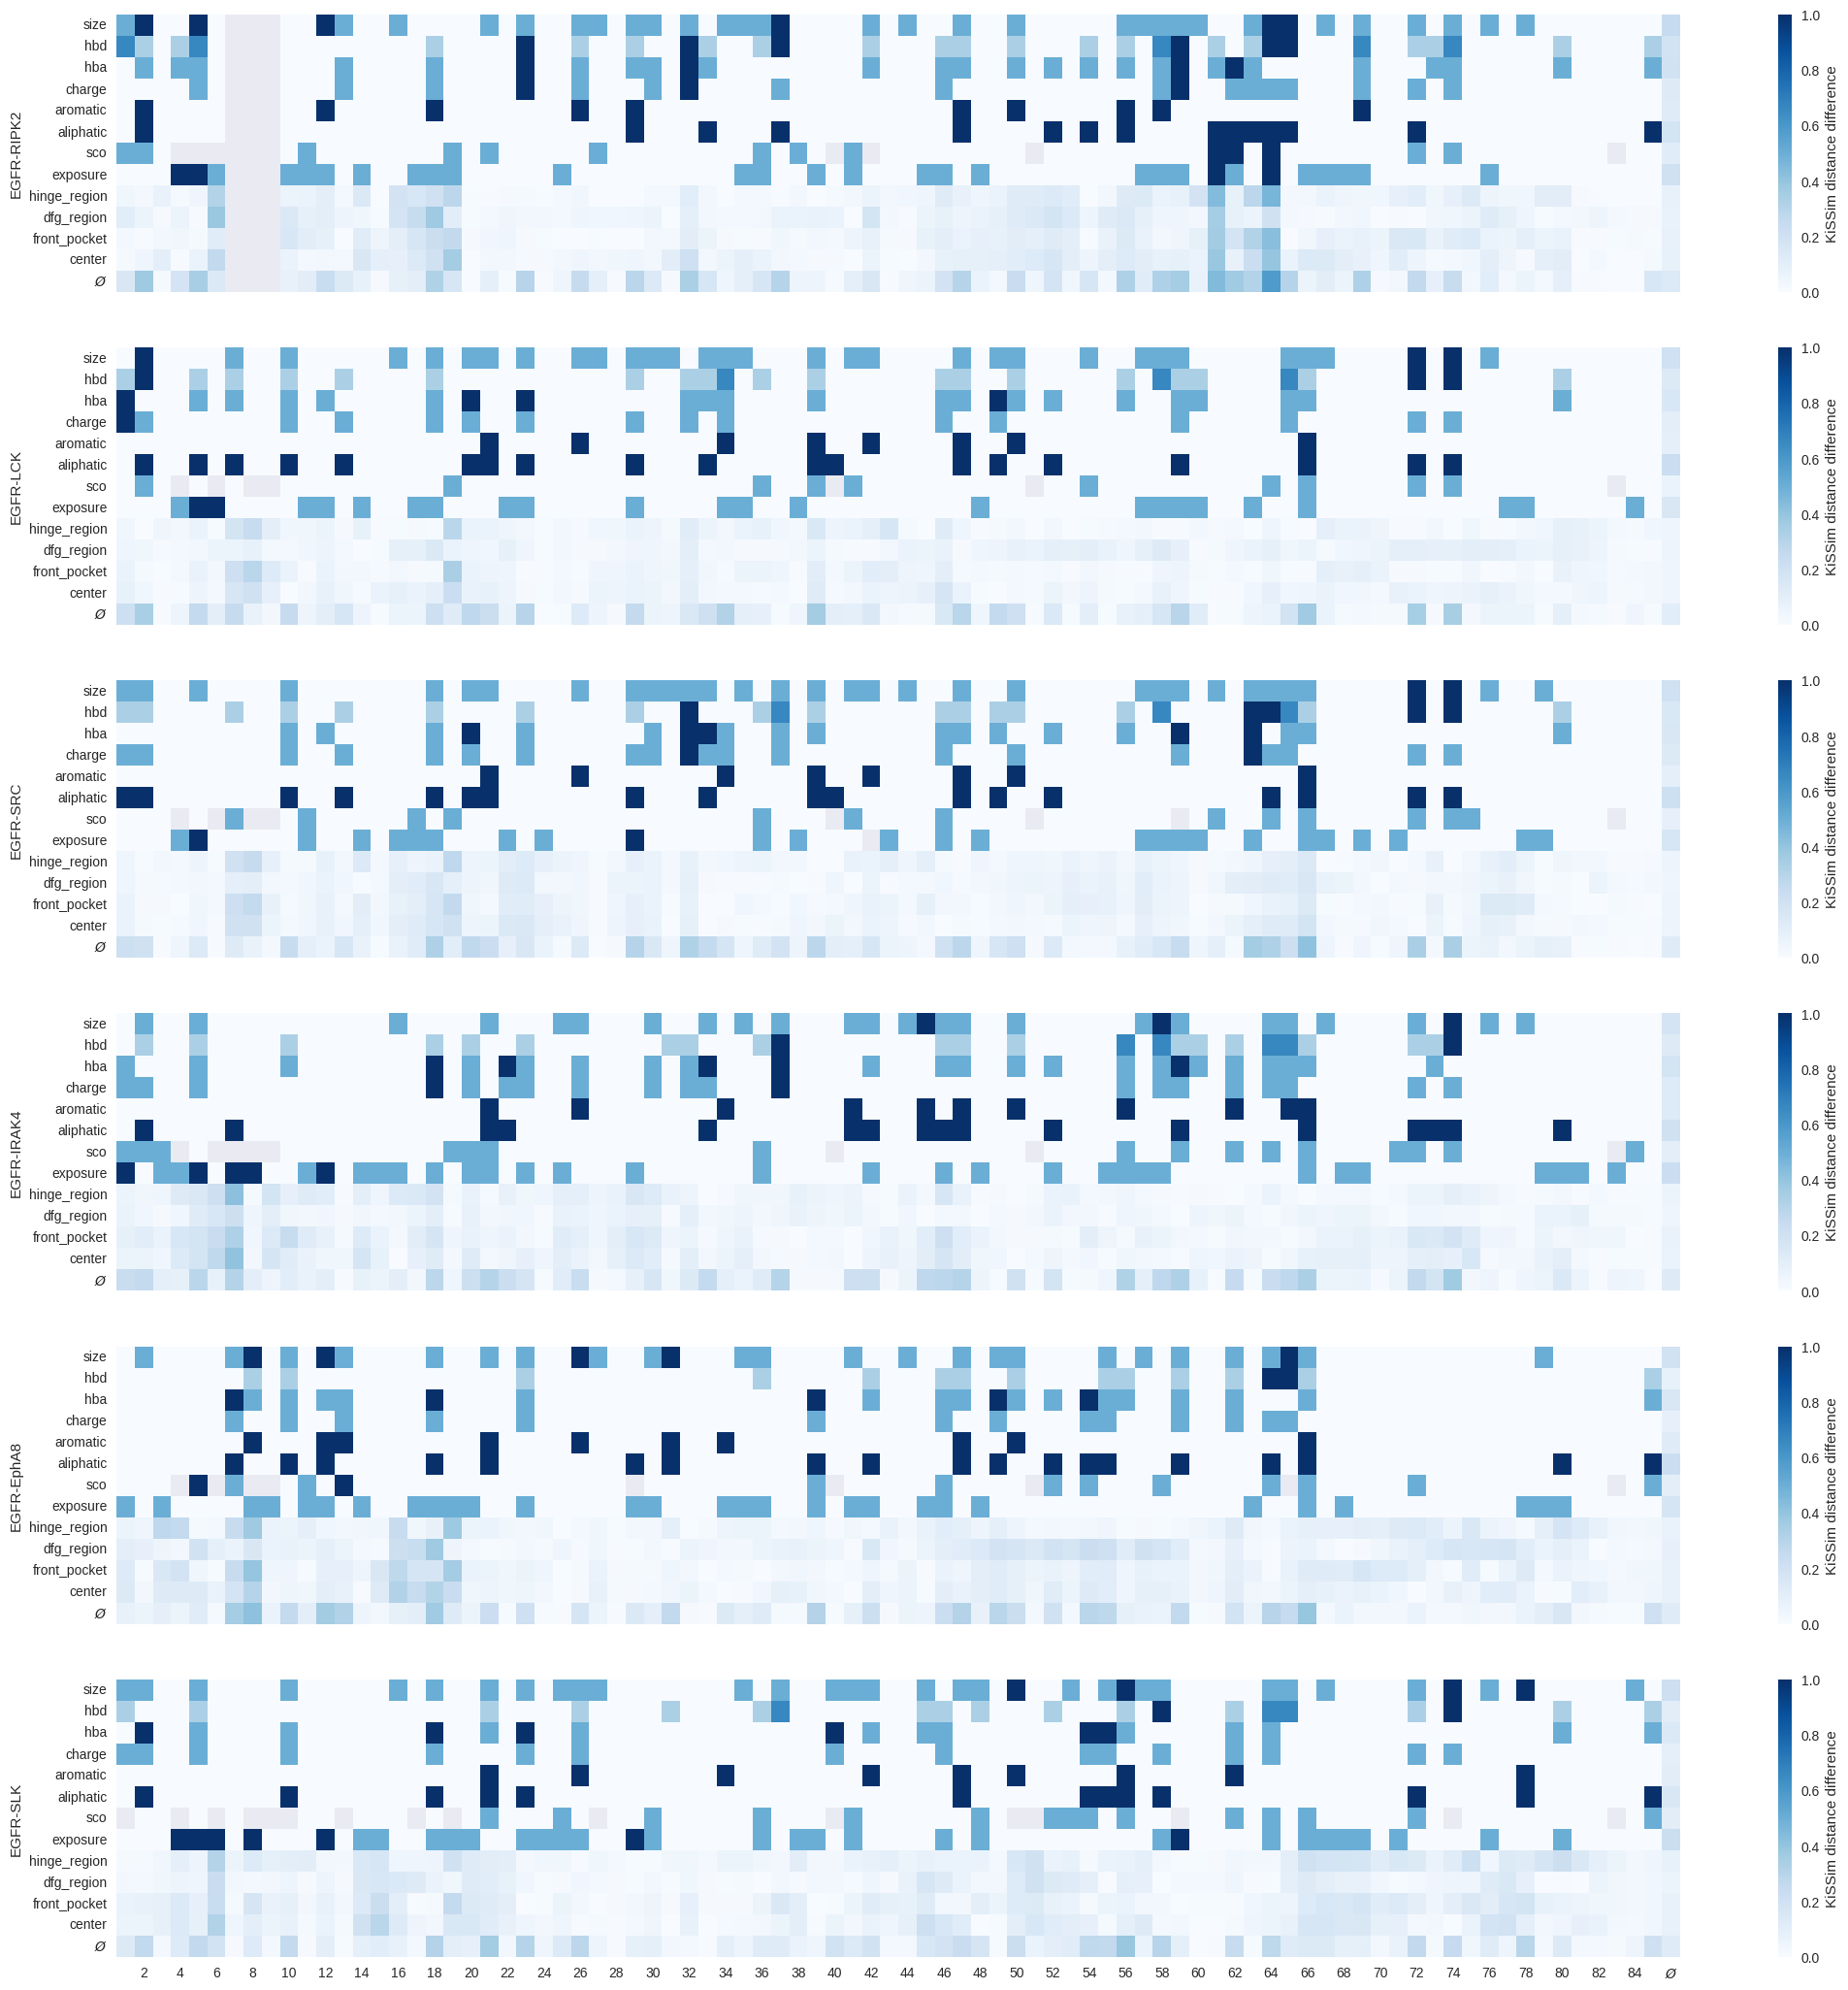

In [14]:
def get_pair_from_klifs_id(fingerprint_distance_generator,klifs_id1,klifs_id2):

    data = fingerprint_distance_generator.data
    data_selected = data[
        (data["structure.1"] == klifs_id1) & (data["structure.2"] == klifs_id2)
        | (data["structure.1"] == klifs_id2) & (data["structure.2"] == klifs_id1)
    ]
    pair = data_selected.sort_values("distance").iloc[0, :]
    return pair
pairs_to_plot = []
for klif_id in klif_ids_all:
    if klif_id != 815:
        pair = get_pair_from_klifs_id(fingerprint_distance_generator,815,klif_id)
        pairs_to_plot.append(pair)
print(pairs_to_plot)

fig, ax = plt.subplots(len(pairs_to_plot), 1, figsize=(26, 26), sharex=True)
for i, pair in enumerate(pairs_to_plot):
    plot_fingerprint_diff(fingerprints, pair, ax[i])


[815, 2821, 559, 1193, 5363, 3394]
[structure.1          815
structure.2         2821
kinase.1            EGFR
kinase.2           ErbB4
distance        0.064369
bit_coverage    0.994667
Name: 1603, dtype: object, structure.1          815
structure.2          559
kinase.1            EGFR
kinase.2           EphB1
distance        0.145018
bit_coverage    0.983333
Name: 1560, dtype: object, structure.1          815
structure.2         1193
kinase.1            EGFR
kinase.2             SYK
distance        0.149874
bit_coverage        0.99
Name: 1561, dtype: object, structure.1          815
structure.2         5363
kinase.1            EGFR
kinase.2             ALK
distance        0.150972
bit_coverage    0.991333
Name: 1569, dtype: object, structure.1          815
structure.2         3394
kinase.1            EGFR
kinase.2             ACK
distance        0.160371
bit_coverage    0.963333
Name: 1629, dtype: object]


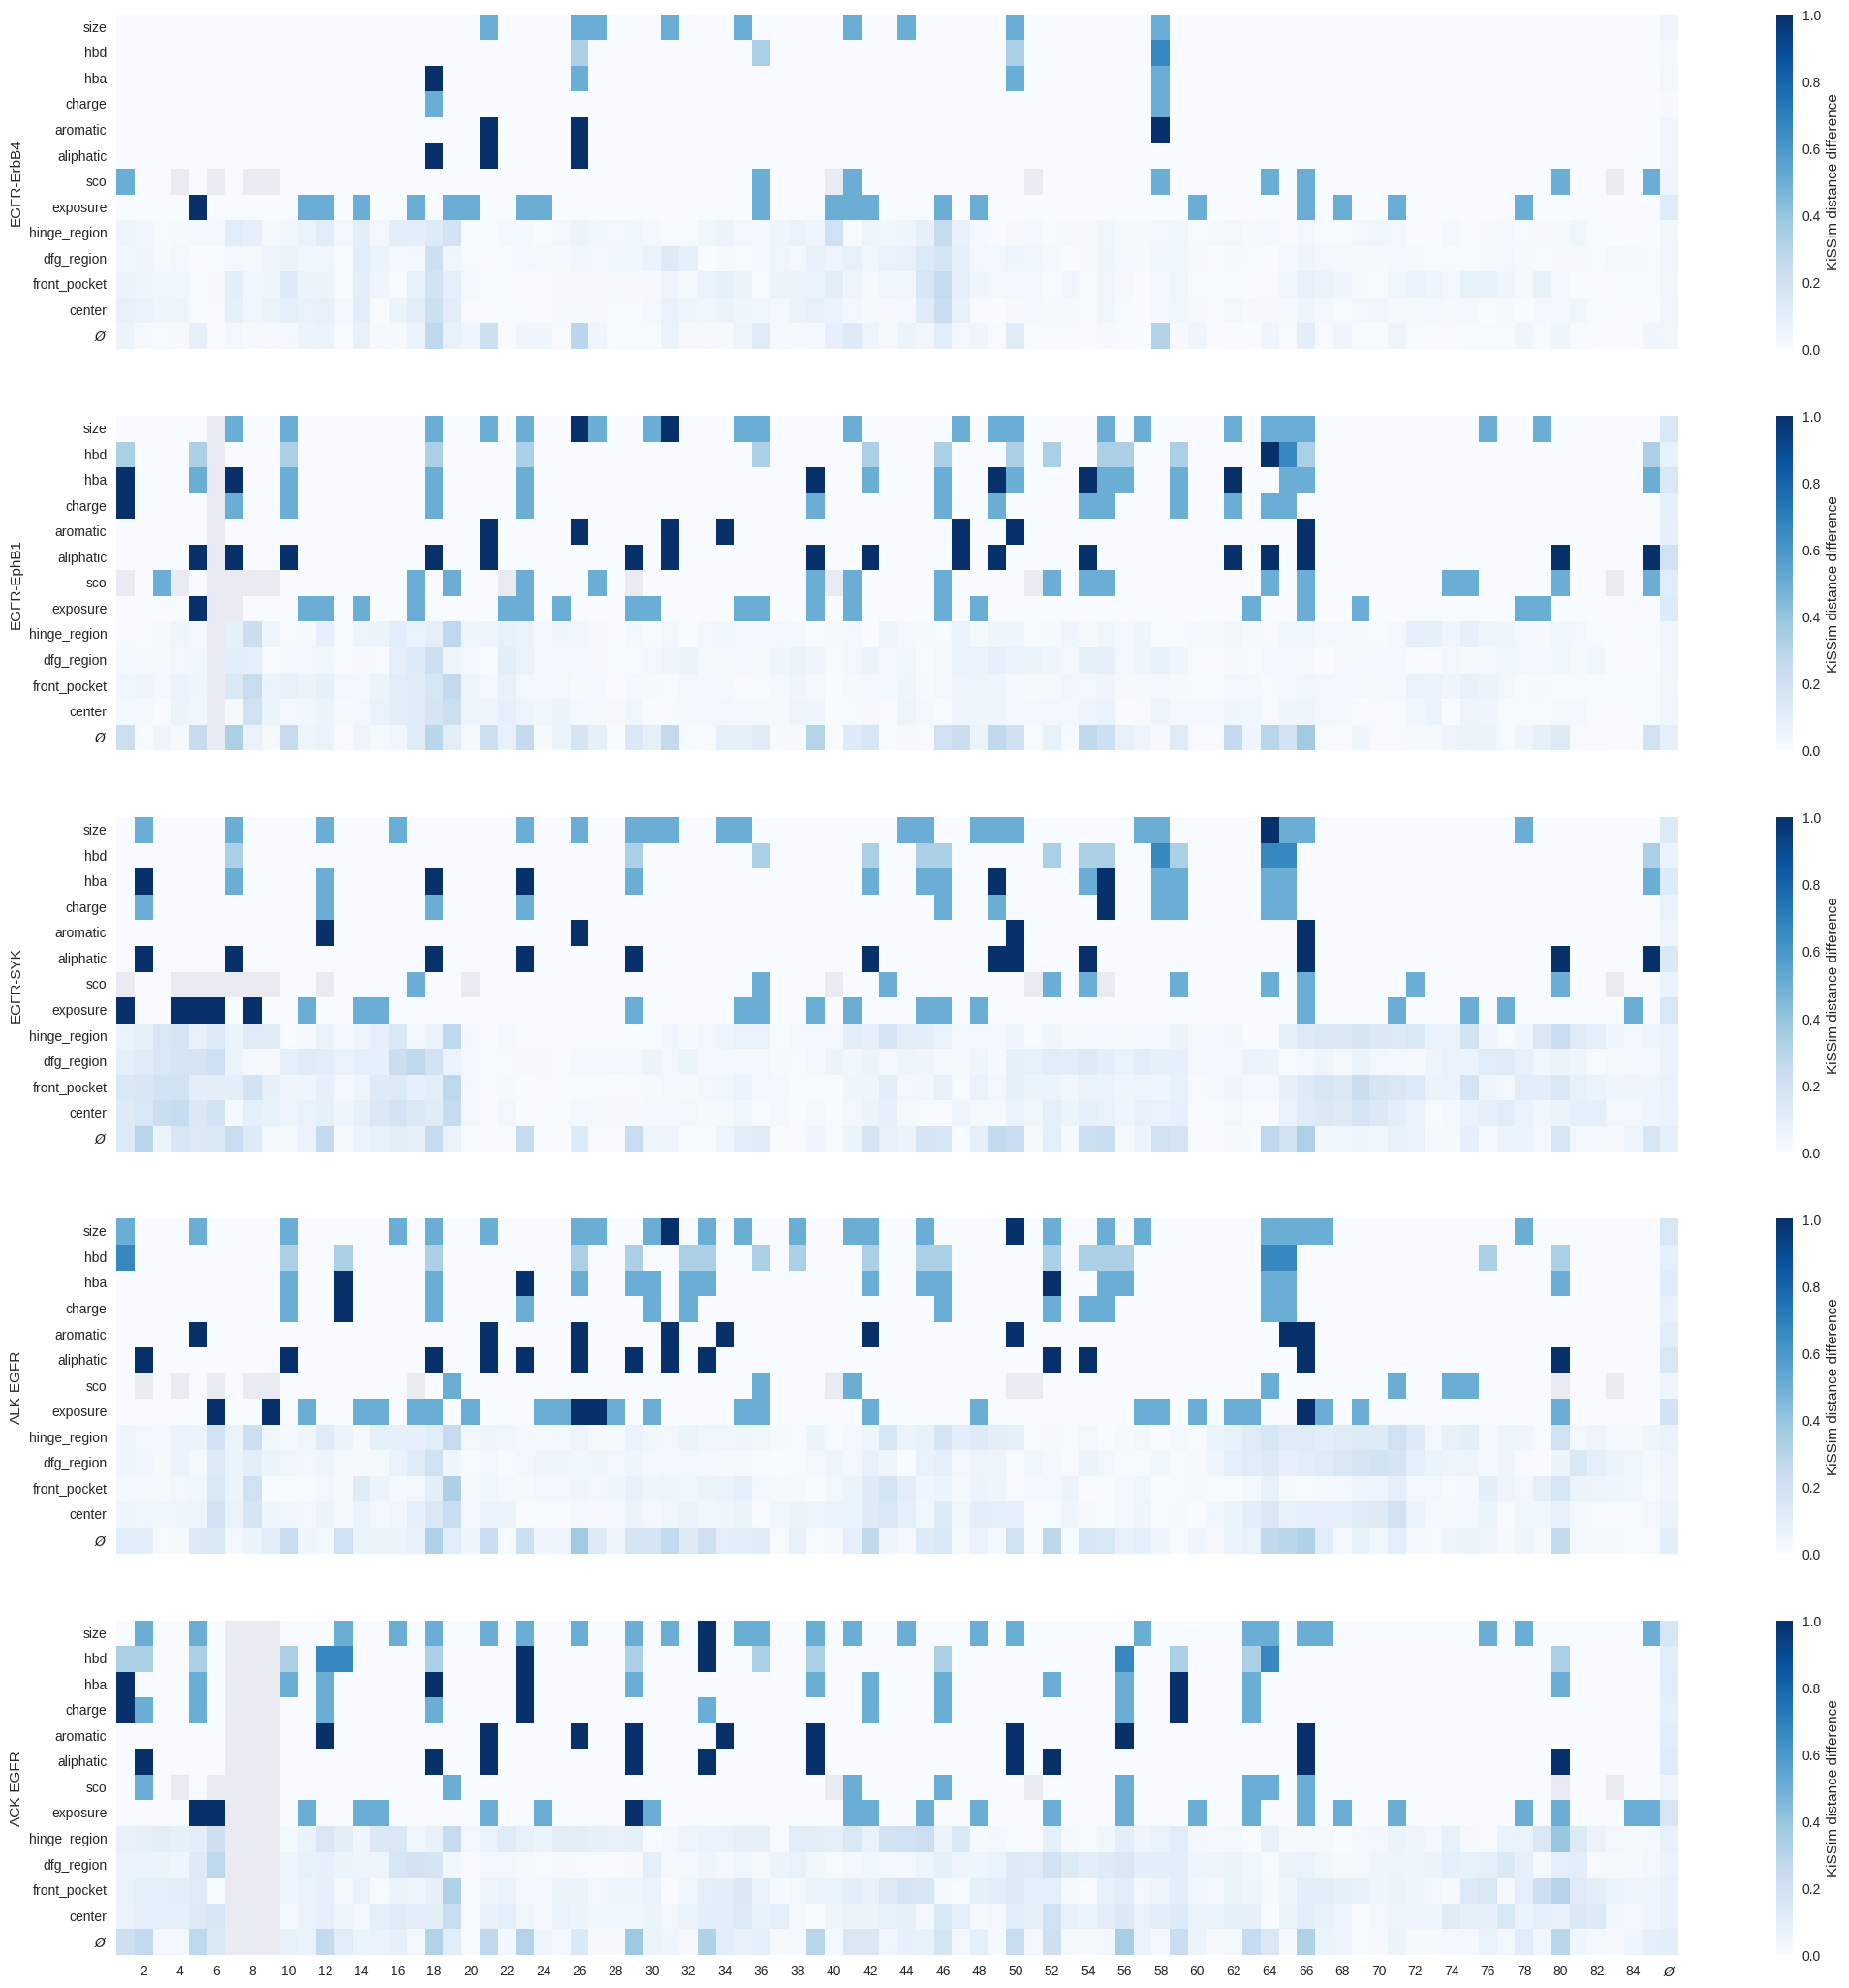

In [15]:
#also get the top 5 closest according to the fingerprint distance, and plot those two
#first get the klifs ids of the top 5 closest
kinases_closest_to_egfr = distance_to_egfr[:6]
klif_ids_closest_to_egfr = []
for kinase in kinases_closest_to_egfr:
    klifs_id = structures_apo_dfg_in_ac_in_unique[structures_apo_dfg_in_ac_in_unique["kinase.klifs_name"] == kinase]["structure.klifs_id"].values[0]
    klif_ids_closest_to_egfr.append(klifs_id)
print(klif_ids_closest_to_egfr)

pairs_to_plot = []
for klif_id in klif_ids_closest_to_egfr:
    if klif_id != 815:
        pair = get_pair_from_klifs_id(fingerprint_distance_generator,815,klif_id)
        pairs_to_plot.append(pair)
print(pairs_to_plot)

fig, ax = plt.subplots(len(pairs_to_plot), 1, figsize=(26, 26), sharex=True)
for i, pair in enumerate(pairs_to_plot):
    plot_fingerprint_diff(fingerprints, pair, ax[i])


In [16]:
#lets get the structure id of these
structures_all_filtered = structures_all_filtered[structures_all_filtered["kinase.klifs_name"].isin(profiling_df_Vatalanib_actives.index)]
structures_all_filtered

NameError: name 'structures_all_filtered' is not defined

In [17]:
Vandetanib_actives_ordered = profiling_df['Vandetanib'].sort_values().index.tolist()


In [67]:
profiling_df['Pelitinib'].sort_values().head(20)

EGFR        0.44
GAK         6.40
KHS1       10.00
ErbB4      21.00
DMPK1      59.00
BLK        78.00
LCK        99.00
CK1e      100.00
KHS2      170.00
TNIK      170.00
DRAK1     200.00
HPK1      270.00
MAP3K4    280.00
SRC       280.00
CRIK      310.00
LOK       330.00
HGK       330.00
MAP2K1    360.00
SLK       360.00
ABL2      370.00
Name: Pelitinib, dtype: float64

In [18]:
#now reproduce this with the same kinases, but all structures
structures_all_filtered =  structures[structures["structure.dfg"] == "in"]
structures_all_filtered = structures_all_filtered[structures_all_filtered["structure.ac_helix"] == "in"]
structures_all_filtered
apo_kinase_names = structures_apo_dfg_in_ac_in_unique["kinase.klifs_name"].to_list()
structures_all_filtered = structures_all_filtered[structures_all_filtered["kinase.klifs_name"].isin(apo_kinase_names)]
print(structures_all_filtered['kinase.klifs_name'].nunique())
klifs_ids_all_structures = structures_all_filtered["structure.klifs_id"].to_list()
# fingerprint_distance_generator_all = FingerprintDistanceGenerator.from_structure_klifs_ids(klifs_ids_all_structures, remote, n_cores=16)
# fingerprint_distance_generator_all
KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
kinase_kinase_csv = pd.read_csv(KINASE_KINASE_PATH)
kinase_kinase_csv

105


,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
0,4,8,EphA7,ITK,0.064311,0.954000
1,4,9,EphA7,ITK,0.094182,0.985333
2,4,11,EphA7,ITK,0.075470,0.977333
3,4,12,EphA7,ITK,0.066460,0.962000
4,4,16,EphA7,ITK,0.075279,0.985333
...,...,...,...,...,...,...
8452211,13857,13863,Wee1,ATM,0.150554,0.972000
8452212,13857,13864,Wee1,ATM,0.148120,0.972000
8452213,13862,13863,ATM,ATM,0.011811,0.976667
8452214,13862,13864,ATM,ATM,0.012624,0.976667


In [19]:
kinase_kinase_csv_filtered = kinase_kinase_csv[kinase_kinase_csv["kinase.1"].isin(apo_kinase_names)]
kinase_kinase_csv_filtered = kinase_kinase_csv_filtered[kinase_kinase_csv_filtered["kinase.2"].isin(apo_kinase_names)]
kinase_kinase_csv_filtered.to_csv("kinase_kinase_csv_filtered.csv")


           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

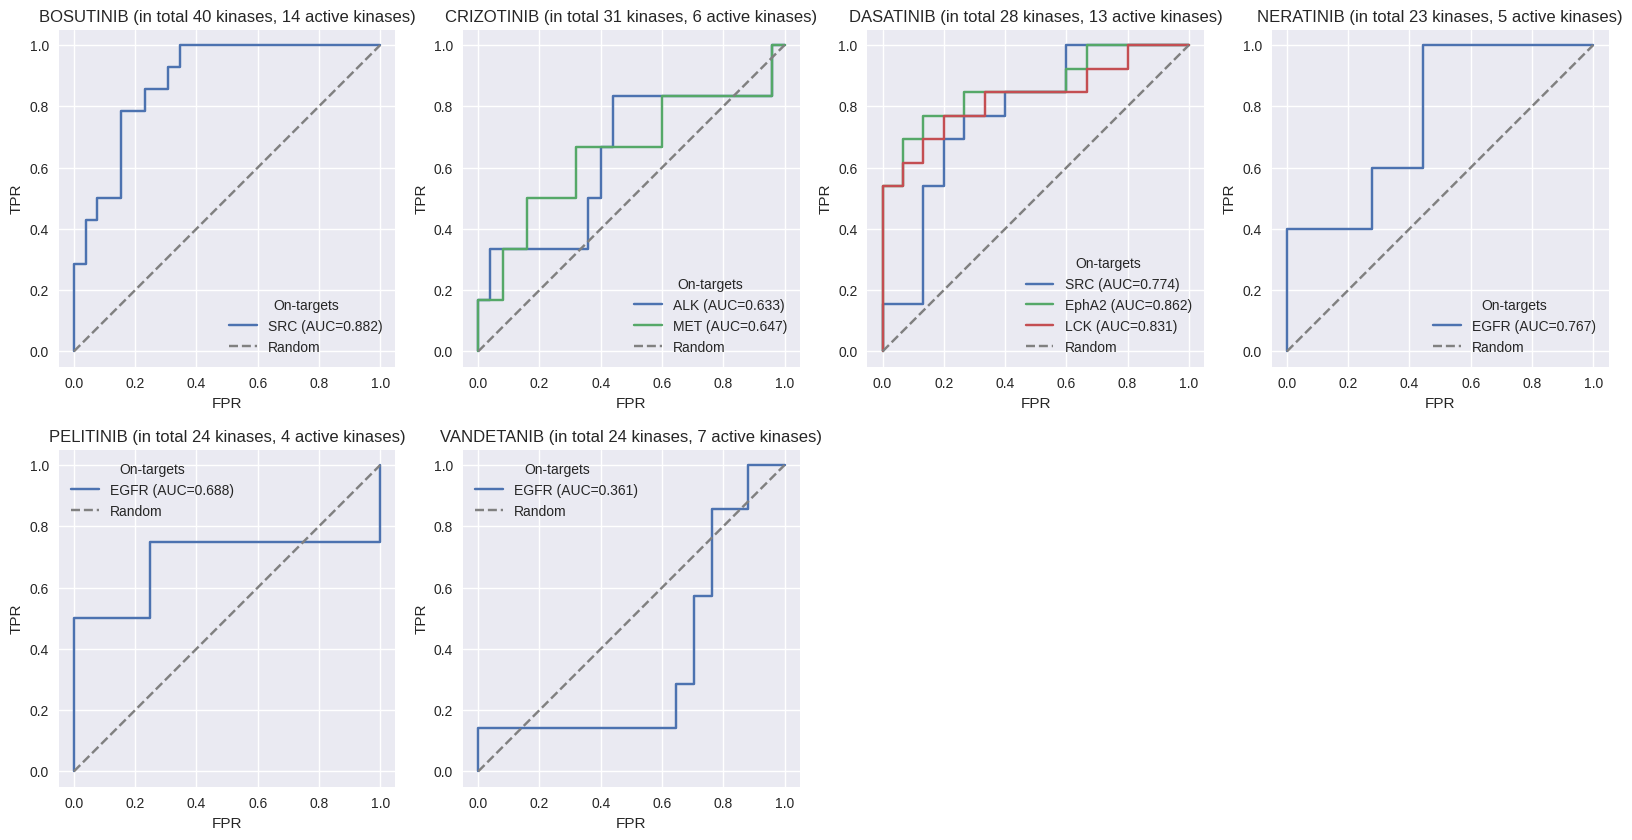

In [20]:
fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_filtered.csv")
distance_matrix_all = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_all = Path("distance_matrix_tmp_all.csv")
distance_matrix_all.to_csv(distance_matrix_path_all)

# Kinase-ligand profiling dataset
profiling_df = data.profiling.load(
    ligand_profiling_method, pkidb_ligands=True, fda_approved=False
)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)
evaluator = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_all,
)
distance_matrix_path_all.unlink()  # Remove file again!
aucs_all = evaluator.plot_roc_curves()
plt.show()

Bosutinib-SRC 0.8818681318681318 0.9010989010989011
Crizotinib-ALK 0.6333333333333334 0.72
Crizotinib-MET 0.6466666666666667 0.6933333333333332
Dasatinib-SRC 0.7743589743589743 0.7846153846153847
Dasatinib-EphA2 0.8615384615384616 0.8717948717948718
Dasatinib-LCK 0.8307692307692308 0.8769230769230769
Neratinib-EGFR 0.7666666666666666 0.7444444444444445
Pelitinib-EGFR 0.6875 0.725
Vandetanib-EGFR 0.36134453781512604 0.49579831932773105


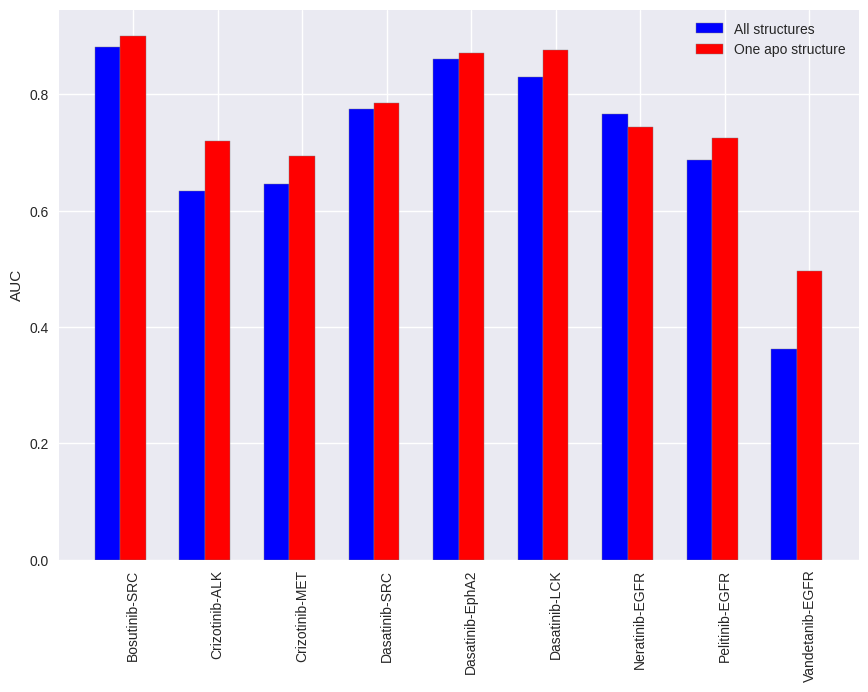

In [21]:


# plt.show()
import numpy as np
values_dict = {}
ligands = aucs_all.keys()
for ligand in ligands:
    print(ligand, aucs_all[ligand], aucs_one_apo_structure[ligand])
    values_dict[ligand] = (aucs_all[ligand], aucs_one_apo_structure[ligand])


#now barplot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ligands = values_dict.keys()
aucs_all_values = [values_dict[ligand][0] for ligand in ligands]
aucs_one_apo_structure_values = [values_dict[ligand][1] for ligand in ligands]
barWidth = 0.3
r1 = np.arange(len(aucs_all_values))
r2 = [x + barWidth for x in r1]
ax.bar(r1, aucs_all_values, color='b', width=barWidth, edgecolor='grey', label='All structures')
ax.bar(r2, aucs_one_apo_structure_values, color='r', width=barWidth, edgecolor='grey', label='One apo structure')
ax.set_xticks([r + barWidth for r in range(len(aucs_all_values))])
ax.set_xticklabels(ligands)
plt.xticks(rotation=90)
#add legend
ax.legend()
plt.ylabel("AUC")
plt.show()

           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

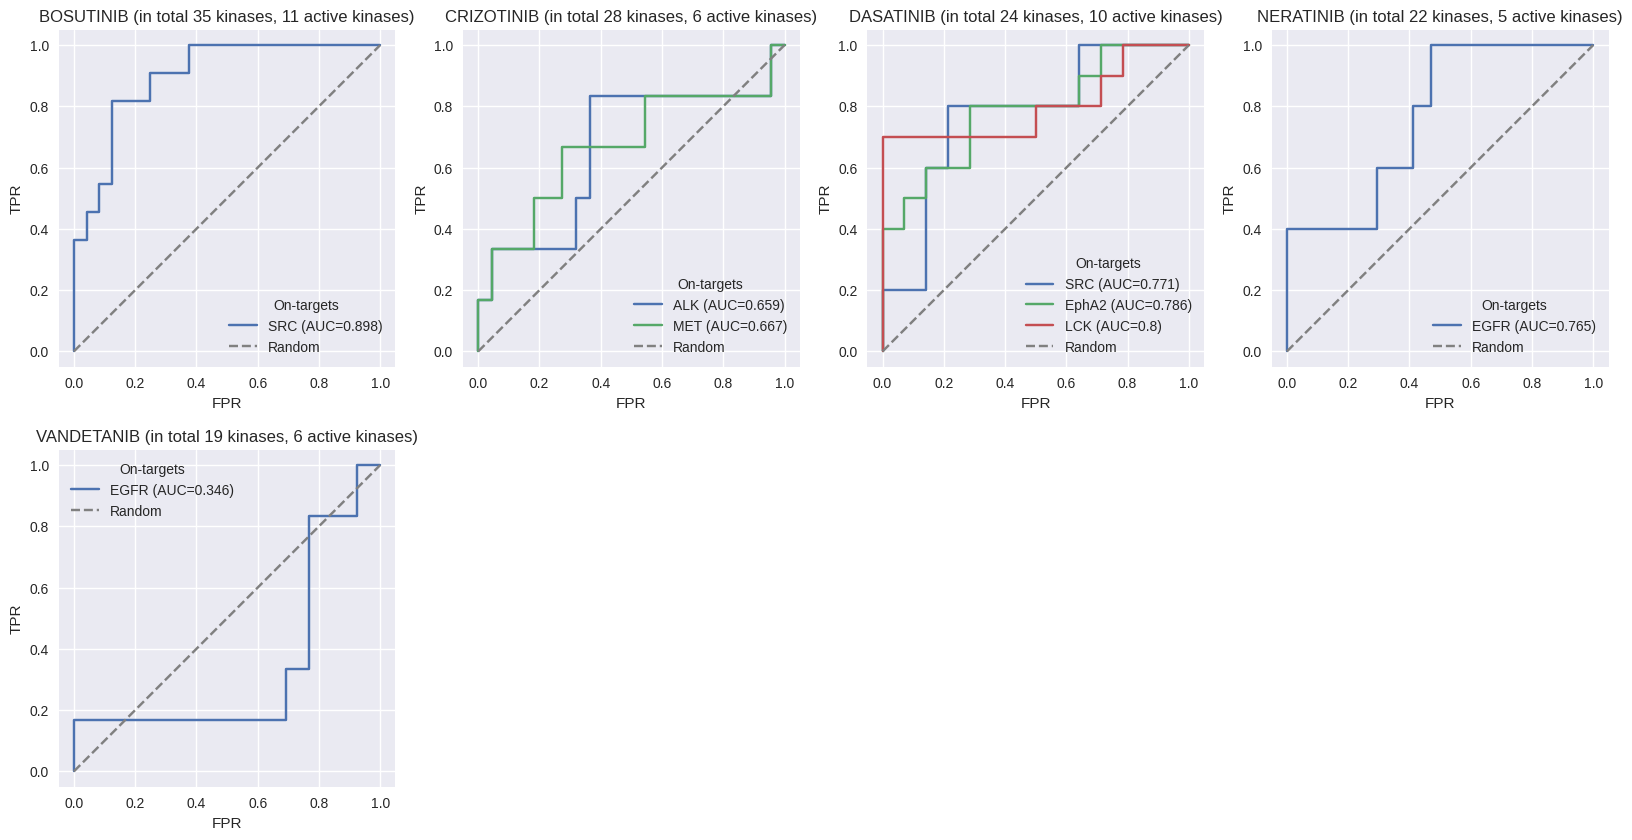

In [41]:
structures_apo = structures[structures["ligand.expo_id"] == "-"]
structures_apo = structures_apo[structures_apo["ligand_allosteric.expo_id"] == "-"]
klif_ids_apo = structures_apo["structure.klifs_id"].to_list()
kinase_kinase_csv_filtered = pd.read_csv("kinase_kinase_csv_filtered.csv")
kinase_kinase_csv_filtered_no_apo = kinase_kinase_csv_filtered[~kinase_kinase_csv_filtered["structure.1"].isin(klif_ids_apo)]
kinase_kinase_csv_filtered_no_apo = kinase_kinase_csv_filtered_no_apo[~kinase_kinase_csv_filtered_no_apo["structure.2"].isin(klif_ids_apo)]
kinase_kinase_csv_filtered_no_apo.to_csv("kinase_kinase_csv_filtered_no_apo.csv")
fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_filtered_no_apo.csv")
distance_matrix_no_apo = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_no_apo = Path("distance_matrix_no_apo.csv")
distance_matrix_no_apo.to_csv(distance_matrix_path_no_apo)

evaluator = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_no_apo,
)
distance_matrix_path_no_apo.unlink()  # Remove file again!
aucs_all_no_apo = evaluator.plot_roc_curves()

           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

{'Bosutinib-SRC': 0.8818681318681318,
 'Crizotinib-ALK': 0.6333333333333334,
 'Crizotinib-MET': 0.6466666666666667,
 'Dasatinib-SRC': 0.7743589743589743,
 'Dasatinib-EphA2': 0.8615384615384616,
 'Dasatinib-LCK': 0.8307692307692308,
 'Neratinib-EGFR': 0.7666666666666666,
 'Pelitinib-EGFR': 0.6875,
 'Vandetanib-EGFR': 0.36134453781512604}

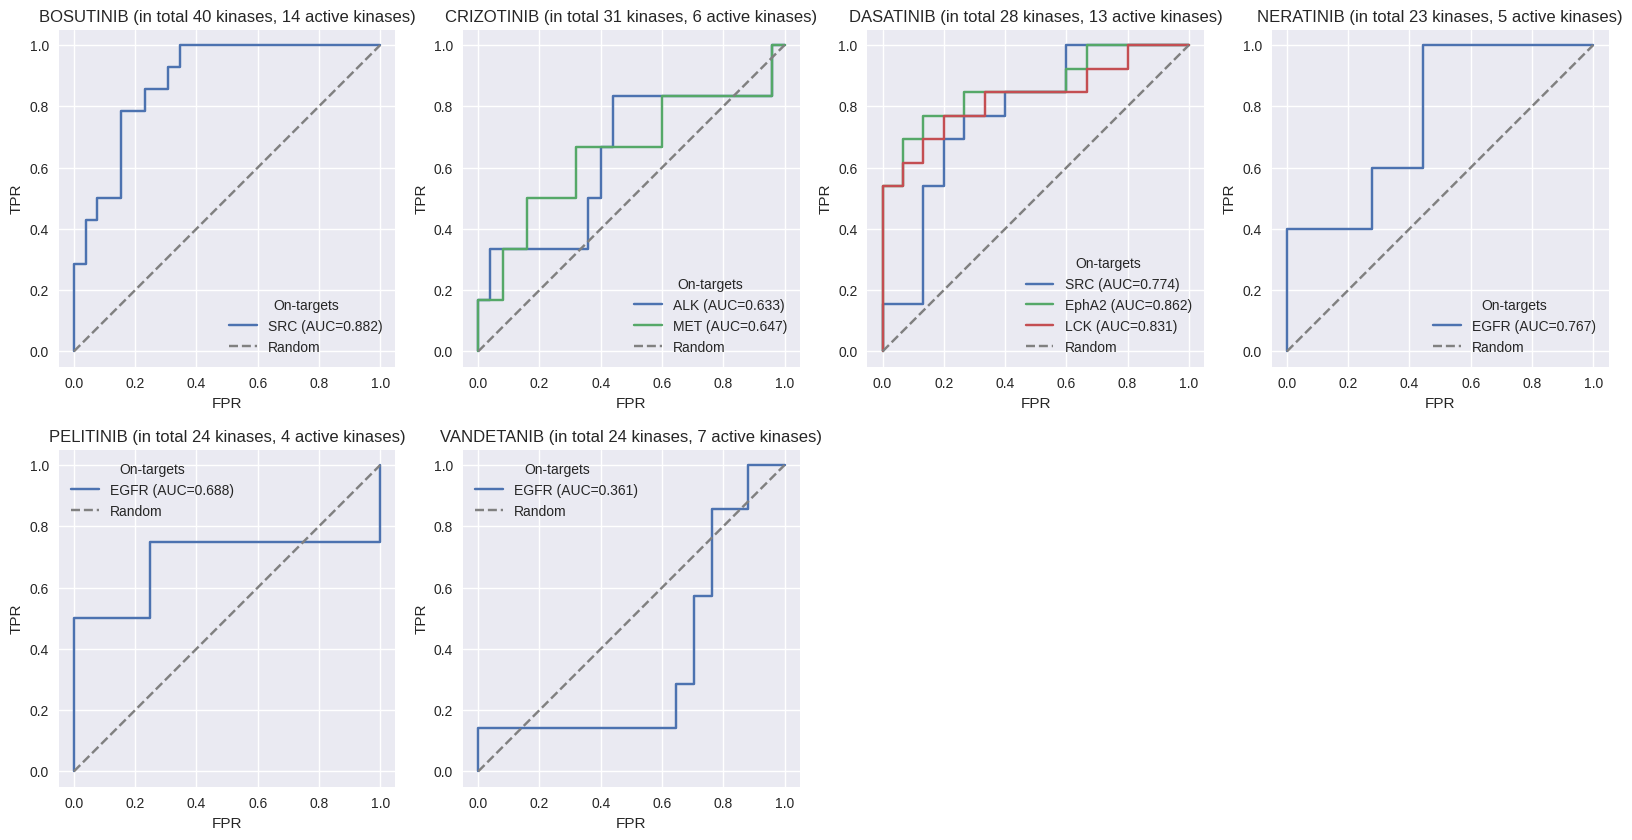

In [42]:
fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_filtered.csv")
distance_matrix_incl_apo = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_incl_apo = Path("distance_matrix_incl_apo.csv")
distance_matrix_incl_apo.to_csv(distance_matrix_path_incl_apo)

evaluator = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_incl_apo,
)
distance_matrix_path_incl_apo.unlink()  # Remove file again!
aucs_all_incl_apo = evaluator.plot_roc_curves()
aucs_all_incl_apo

In [47]:
aucs_all_no_apo,aucs_all_incl_apo

({'Bosutinib-SRC': 0.8977272727272727,
  'Crizotinib-ALK': 0.6590909090909092,
  'Crizotinib-MET': 0.6666666666666667,
  'Dasatinib-SRC': 0.7714285714285715,
  'Dasatinib-EphA2': 0.7857142857142857,
  'Dasatinib-LCK': 0.7999999999999999,
  'Neratinib-EGFR': 0.7647058823529411,
  'Vandetanib-EGFR': 0.34615384615384615},
 {'Bosutinib-SRC': 0.8818681318681318,
  'Crizotinib-ALK': 0.6333333333333334,
  'Crizotinib-MET': 0.6466666666666667,
  'Dasatinib-SRC': 0.7743589743589743,
  'Dasatinib-EphA2': 0.8615384615384616,
  'Dasatinib-LCK': 0.8307692307692308,
  'Neratinib-EGFR': 0.7666666666666666,
  'Pelitinib-EGFR': 0.6875,
  'Vandetanib-EGFR': 0.36134453781512604})

[0.8977272727272727, 0.6590909090909092, 0.6666666666666667, 0.7714285714285715, 0.7857142857142857, 0.7999999999999999, 0.7647058823529411, 0.34615384615384615] [0.8818681318681318, 0.6333333333333334, 0.6466666666666667, 0.7743589743589743, 0.8615384615384616, 0.8307692307692308, 0.7666666666666666, 0.36134453781512604] [0.9010989010989011, 0.72, 0.6933333333333332, 0.7846153846153847, 0.8717948717948718, 0.8769230769230769, 0.7444444444444445, 0.49579831932773105]


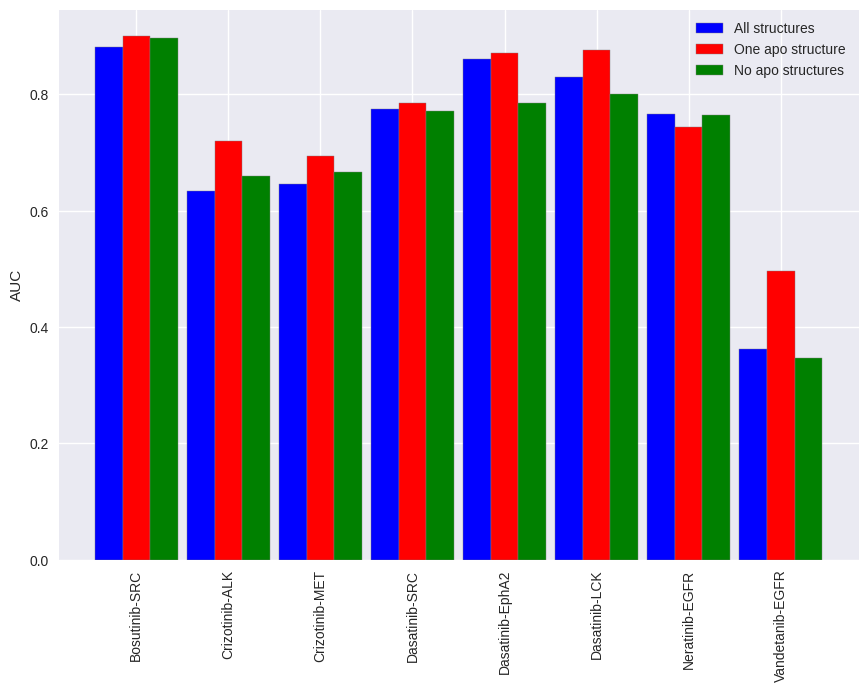

In [54]:
#now add this to the barplot
ligands = values_dict.keys()
ligands_no_pelitinib = [ligand for ligand in ligands if ligand != 'Pelitinib-EGFR']
values_dict_no_apo = {}
ligands = aucs_all_no_apo.keys()
for ligand in ligands_no_pelitinib:
    values_dict_no_apo[ligand] = (aucs_all_no_apo[ligand], aucs_one_apo_structure[ligand])

#now barplot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

aucs_all_values = [values_dict[ligand][0] for ligand in ligands_no_pelitinib]
aucs_one_apo_structure_values = [values_dict[ligand][1] for ligand in ligands_no_pelitinib]
aucs_all_no_apo_values = [values_dict_no_apo[ligand][0] for ligand in ligands_no_pelitinib]
print(aucs_all_no_apo_values, aucs_all_values, aucs_one_apo_structure_values)
barWidth = 0.3
r1 = np.arange(len(aucs_all_values))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
ax.bar(r1, aucs_all_values, color='b', width=barWidth, edgecolor='grey', label='All structures')
ax.bar(r2, aucs_one_apo_structure_values, color='r', width=barWidth, edgecolor='grey', label='One apo structure')
ax.bar(r3, aucs_all_no_apo_values, color='g', width=barWidth, edgecolor='grey', label='No apo structures')
ax.set_xticks([r + barWidth for r in range(len(aucs_all_values))])
ax.set_xticklabels(ligands_no_pelitinib)
plt.xticks(rotation=90)
#add legend
ax.legend()
plt.ylabel("AUC")
plt.show()

In [56]:
#wait, so do we assume that apo structures should be most similar to each other? and is this valid?
KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
kinase_kinase_csv = pd.read_csv(KINASE_KINASE_PATH)
kinase_kinase_csv

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
0,4,8,EphA7,ITK,0.064311,0.954000
1,4,9,EphA7,ITK,0.094182,0.985333
2,4,11,EphA7,ITK,0.075470,0.977333
3,4,12,EphA7,ITK,0.066460,0.962000
4,4,16,EphA7,ITK,0.075279,0.985333
...,...,...,...,...,...,...
8452211,13857,13863,Wee1,ATM,0.150554,0.972000
8452212,13857,13864,Wee1,ATM,0.148120,0.972000
8452213,13862,13863,ATM,ATM,0.011811,0.976667
8452214,13862,13864,ATM,ATM,0.012624,0.976667


In [66]:
kinase_kinase_csv_apo_kinases_only = kinase_kinase_csv[kinase_kinase_csv["kinase.1"].isin(apo_kinase_names)]
kinase_kinase_csv_apo_kinases_only = kinase_kinase_csv_apo_kinases_only[kinase_kinase_csv_apo_kinases_only["kinase.2"].isin(apo_kinase_names)]
kinase_kinase_csv_apo_kinases_only = kinase_kinase_csv_apo_kinases_only.sort_values("distance")
kinase_kinase_csv_apo_kinases_only['kinase1-kinase2'] = kinase_kinase_csv_apo_kinases_only["kinase.1"] + "-" + kinase_kinase_csv_apo_kinases_only["kinase.2"]
kinase_kinase_csv_apo_kinases_only = kinase_kinase_csv_apo_kinases_only.drop_duplicates("kinase1-kinase2")
kinase_kinase_csv_apo_kinases_only = kinase_kinase_csv_apo_kinases_only[kinase_kinase_csv_apo_kinases_only["kinase.1"] != kinase_kinase_csv_apo_kinases_only["kinase.2"]]
structure1_ids = kinase_kinase_csv_apo_kinases_only['structure.1'].to_list()
structure2_ids = kinase_kinase_csv_apo_kinases_only['structure.2'].to_list()

structure_1_ligands, structure_2_ligands = [], []

for structure_id in structure1_ids:
    try:
        ligand = structures[structures["structure.klifs_id"] == structure_id]["ligand.expo_id"].values[0]
        structure_1_ligands.append(ligand)
    except IndexError:
        print(structure_id)
for structure_id in structure2_ids:
    try:
        ligand = structures[structures["structure.klifs_id"] == structure_id]["ligand.expo_id"].values[0]
        structure_2_ligands.append(ligand)
    except IndexError:
        print(structure_id)

932
12797
932
932
932
932
932
802
802
802
802
802
802
802
802
12797
802
802
12797
932
802
932
802
802
932
802
802
802
932
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
802
12797
12797
12797
12797
12797
12797
12797
932
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
12797
-      3304
ANP     575
ADP     246
STU     244
ACP     165
       ... 
4ZG       1
QC0       1
199       1
LM3       1
2NQ       1
Length: 811, dtype: int64
-      2389
ANP     408
ADP     256
ATP     164
STU     130
       ... 
KXZ       1
GDK       1
AWE       1
YVQ       1
VY4       1
Length: 788, dtype: int64


In [80]:
n_the_same, n_both_apo = 0, 0
for l1,l2 in zip(structure_1_ligands,structure_2_ligands):
    if l1 == l2:
        n_the_same += 1
    if l1 == "-" and l2 == "-":
        n_both_apo += 1
#print percentage of both
print(f'% of structures where both have the same ligand: {n_the_same/len(structure_1_ligands)*100}')
print(f'% of structures where both are apo: {n_both_apo/len(structure_1_ligands)*100}')

% of structures where both have the same ligand: 9.40599018331163
% of structures where both are apo: 8.544525693679255


In [72]:
print(pd.Series(structure_1_ligands).value_counts(normalize=True))
print(pd.Series(structure_2_ligands).value_counts(normalize=True))

-      0.330963
ANP    0.057598
ADP    0.024642
STU    0.024442
ACP    0.016528
         ...   
4ZG    0.000100
QC0    0.000100
199    0.000100
LM3    0.000100
2NQ    0.000100
Length: 811, dtype: float64
-      0.239667
ANP    0.040931
ADP    0.025682
ATP    0.016453
STU    0.013042
         ...   
KXZ    0.000100
GDK    0.000100
AWE    0.000100
YVQ    0.000100
VY4    0.000100
Length: 788, dtype: float64


In [81]:
structures_with_apo_structures = structures[structures["kinase.klifs_name"].isin(apo_kinase_names)]
structures_with_apo_structures
#for each pair of kinases, check if they have a structure with the same ligand
kinase_pairs = []
for kinase1 in apo_kinase_names:
    for kinase2 in apo_kinase_names:
        if kinase1 != kinase2:
            pair = (kinase1,kinase2)
            kinase_pairs.append(pair)


kinase_pairs_ligands = []
for pair in kinase_pairs:
    structures1 = structures_with_apo_structures[structures_with_apo_structures["kinase.klifs_name"] == pair[0]]
    structures2 = structures_with_apo_structures[structures_with_apo_structures["kinase.klifs_name"] == pair[1]]
    ligands1 = structures1["ligand.expo_id"].to_list()
    ligands2 = structures2["ligand.expo_id"].to_list()
    ligands1 = [ligand for ligand in ligands1 if ligand != "-"]
    ligands2 = [ligand for ligand in ligands2 if ligand != "-"]
    if len(ligands1) > 0 and len(ligands2) > 0:
        if len(set(ligands1).intersection(ligands2)) > 0:
            kinase_pairs_ligands.append(pair)

#now print out the percentage of kinase pairs that have a structure with the same ligand
print(f'% of kinase pairs that have a structure with the same ligand: {len(kinase_pairs_ligands)/len(kinase_pairs)*100}')


% of kinase pairs that have a structure with the same ligand: 21.025641025641026


In [100]:
#okay wait, what we actually want to know is this; for kinase pairs that have a structure with the same ligand, how often is the minimum distance between these two kinases the one between the structures witht the same ligand?
matrix_df = pd.read_csv("kinase_ligand_matrix.csv",index_col=0)
#get all the pairs where the kinases are not the same, and where the cell does not contain an empty dict
kinases = matrix_df.columns[1:]
dict_pairs_same_ligand = {}
for kinase1 in kinases:
    for kinase2 in kinases:
        if kinase1 != kinase2:
            cell_value = matrix_df[kinase1][kinase2]
            if cell_value != {}:
                dict_pairs_same_ligand[(kinase1,kinase2)] = cell_value
dict_pairs_same_ligand = {k: v for k, v in dict_pairs_same_ligand.items() if v != 'set()'}
dict_pairs_same_ligand

{('ITK', 'PYK2'): "{'-'}",
 ('ITK', 'MSK1'): "{'-'}",
 ('ITK', 'SRPK1'): "{'-', 'ADP'}",
 ('ITK', 'AMPKa1'): "{'-', 'STU'}",
 ('ITK', 'TTN'): "{'-'}",
 ('ITK', 'PAK1'): "{'-'}",
 ('ITK', 'AMPKa2'): "{'-', 'STU'}",
 ('ITK', 'FAK'): "{'ADP'}",
 ('ITK', 'MARK1'): "{'-'}",
 ('ITK', 'MER'): "{'-', 'ADP'}",
 ('ITK', 'NEK2'): "{'-'}",
 ('ITK', 'GAK'): "{'-'}",
 ('ITK', 'EphB4'): "{'-', 'STU'}",
 ('ITK', 'DAPK3'): "{'-'}",
 ('ITK', 'Erk5'): "{'-'}",
 ('ITK', 'KIT'): "{'-', 'B49', 'ADP'}",
 ('ITK', 'ROR2'): "{'-'}",
 ('ITK', 'RNAseL'): "{'ADP'}",
 ('ITK', 'FGFR2'): "{'-'}",
 ('ITK', 'PKN1'): "{'-'}",
 ('ITK', 'EphB1'): "{'-', 'ADP'}",
 ('ITK', 'INSR'): "{'-'}",
 ('ITK', 'FLT3'): "{'-'}",
 ('ITK', 'GSK3B'): "{'STU', '-', 'ADP'}",
 ('ITK', 'MNK2'): "{'-', 'STU'}",
 ('ITK', 'TTBK1'): "{'-', 'ADP'}",
 ('ITK', 'EGFR'): "{'-', 'ADP'}",
 ('ITK', 'PKR'): "{'-', 'ADP'}",
 ('ITK', 'FGFR4'): "{'-'}",
 ('ITK', 'SRC'): "{'-'}",
 ('ITK', 'IGF1R'): "{'-'}",
 ('ITK', 'ABL1'): "{'-'}",
 ('ITK', 'DAPK2'): "{'-'}

In [115]:
#iterate over the dict, and for each pair, get the structure.1 and structure.2 for the minimum distance
KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
kinase_kinase_csv = pd.read_csv(KINASE_KINASE_PATH)

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
4136,8,93,ITK,PYK2,0.091651,0.954000
4137,8,95,ITK,PYK2,0.093966,0.954000
6923,8,8686,ITK,PYK2,0.082847,0.952667
8245,9,93,ITK,PYK2,0.100544,0.994000
8246,9,95,ITK,PYK2,0.100903,0.994000
...,...,...,...,...,...,...
102477,81,95,ITK,PYK2,0.091757,0.994000
105263,81,8686,ITK,PYK2,0.090362,0.975333
106561,82,93,ITK,PYK2,0.097214,0.977333
106562,82,95,ITK,PYK2,0.099351,0.977333


In [121]:
dict_pairs_same_ligand.keys()

dict_keys([('ITK', 'PYK2'), ('ITK', 'MSK1'), ('ITK', 'SRPK1'), ('ITK', 'AMPKa1'), ('ITK', 'TTN'), ('ITK', 'PAK1'), ('ITK', 'AMPKa2'), ('ITK', 'FAK'), ('ITK', 'MARK1'), ('ITK', 'MER'), ('ITK', 'NEK2'), ('ITK', 'GAK'), ('ITK', 'EphB4'), ('ITK', 'DAPK3'), ('ITK', 'Erk5'), ('ITK', 'KIT'), ('ITK', 'ROR2'), ('ITK', 'RNAseL'), ('ITK', 'FGFR2'), ('ITK', 'PKN1'), ('ITK', 'EphB1'), ('ITK', 'INSR'), ('ITK', 'FLT3'), ('ITK', 'GSK3B'), ('ITK', 'MNK2'), ('ITK', 'TTBK1'), ('ITK', 'EGFR'), ('ITK', 'PKR'), ('ITK', 'FGFR4'), ('ITK', 'SRC'), ('ITK', 'IGF1R'), ('ITK', 'ABL1'), ('ITK', 'DAPK2'), ('ITK', 'SYK'), ('ITK', 'NEK1'), ('ITK', 'MYT1'), ('ITK', 'MAP2K6'), ('ITK', 'FMS'), ('ITK', 'LIMK1'), ('ITK', 'EphA8'), ('ITK', 'MAPKAPK2'), ('ITK', 'PAK4'), ('ITK', 'Erk3'), ('ITK', 'JAK1-b'), ('ITK', 'MST2'), ('ITK', 'JAK1'), ('ITK', 'CHK1'), ('ITK', 'BARK1'), ('ITK', 'CK1e'), ('ITK', 'IRAK4'), ('ITK', 'IRE1'), ('ITK', 'LYN'), ('ITK', 'CLK3'), ('ITK', 'Wnk1'), ('ITK', 'SLK'), ('ITK', 'p70S6K'), ('ITK', 'PHKg2'),

In [120]:
n_the_same = 0
from tqdm import tqdm
for pair in tqdm(dict_pairs_same_ligand.keys()):
    kinase_kinase_csv_tmp = kinase_kinase_csv[kinase_kinase_csv['kinase.1'] == pair[0]]
    kinase_kinase_csv_tmp = kinase_kinase_csv_tmp[kinase_kinase_csv_tmp['kinase.2'] == pair[1]]
    kinase_kinase_csv_tmp = kinase_kinase_csv_tmp.sort_values("distance")
    struc1 = kinase_kinase_csv_tmp.iloc[0]["structure.1"]
    struc2 = kinase_kinase_csv_tmp.iloc[0]["structure.2"]
    ligand1 = structures[structures["structure.klifs_id"] == struc1]["ligand.expo_id"].values[0]
    ligand2 = structures[structures["structure.klifs_id"] == struc2]["ligand.expo_id"].values[0]
    if ligand1 == ligand2:
        n_the_same += 1
#print percentage 
print(f'% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: {n_the_same/len(dict_pairs_same_ligand)*100}')
    

  0%|          | 8/25542 [00:02<2:07:51,  3.33it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [122]:
import pandas as pd
from tqdm import tqdm

# Step 1: Create a dictionary for structure -> ligand mapping
structure_to_ligand = structures.set_index("structure.klifs_id")["ligand.expo_id"].to_dict()

# Step 2: Filter kinase_kinase_csv based on the pairs in dict_pairs_same_ligand and sort by distance
kinase_pairs_df = pd.DataFrame(list(dict_pairs_same_ligand.keys()), columns=['kinase.1', 'kinase.2'])
kinase_kinase_filtered = kinase_kinase_csv.merge(kinase_pairs_df, on=['kinase.1', 'kinase.2'])

# Step 3: Find the minimum distance per pair and get corresponding structures
kinase_kinase_filtered = kinase_kinase_filtered.sort_values("distance").drop_duplicates(subset=['kinase.1', 'kinase.2'], keep='first')

# Step 4: Map structure IDs to ligands for structure.1 and structure.2
kinase_kinase_filtered['ligand1'] = kinase_kinase_filtered['structure.1'].map(structure_to_ligand)
kinase_kinase_filtered['ligand2'] = kinase_kinase_filtered['structure.2'].map(structure_to_ligand)

# Step 5: Calculate how many pairs have the same ligand
n_the_same = (kinase_kinase_filtered['ligand1'] == kinase_kinase_filtered['ligand2']).sum()

# Step 6: Calculate percentage
percentage = (n_the_same / len(dict_pairs_same_ligand)) * 100
print(f'% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: {percentage:.2f}%')


% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: 6.36%


In [124]:
kinase_kinase_filtered

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage,ligand1,ligand2
3830082,3448,4629,JNK3,JNK1,0.010283,0.987333,AMP,ANP
3081491,10446,12757,ROCK1,ROCK2,0.011370,0.994667,B4J,VFS
107860,110,1090,ABL2,ABL1,0.011441,0.986667,VX6,VX6
1887164,6827,10446,ROCK2,ROCK1,0.012064,0.994667,3SG,B4J
5851483,6424,10715,AMPKa2,AMPKa1,0.012110,0.994667,STU,STU
...,...,...,...,...,...,...,...,...
3330652,2936,10622,VRK3,Trb1,0.202292,0.984667,-,-
3330471,2936,9152,VRK3,PI4KB,0.202512,0.960667,-,093
107777,108,9264,MSK1,PI4K2A,0.206344,0.976000,-,-
5961332,9262,10622,PI4K2A,Trb1,0.210017,0.960667,ADP,-


In [126]:
kinase_kinase_csv_tmp = kinase_kinase_csv[kinase_kinase_csv['kinase.1'] == 'JNK3']
kinase_kinase_csv_tmp = kinase_kinase_csv_tmp[kinase_kinase_csv_tmp['kinase.2'] == 'JNK1']
kinase_kinase_csv_tmp

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
4228844,3414,4628,JNK3,JNK1,0.028547,0.979333
4228845,3414,4629,JNK3,JNK1,0.018222,0.987333
4228846,3414,4630,JNK3,JNK1,0.024016,0.987333
4228847,3414,4631,JNK3,JNK1,0.026397,0.979333
4228848,3414,4632,JNK3,JNK1,0.026348,0.979333
...,...,...,...,...,...,...
6961493,6770,12984,JNK3,JNK1,0.023190,0.984667
6963219,6771,12984,JNK3,JNK1,0.025816,0.984667
8030073,10497,12984,JNK3,JNK1,0.022260,0.936000
8030991,10498,12984,JNK3,JNK1,0.026582,0.976000


In [77]:
structures_with_apo_structures['ligand.expo_id'].value_counts(normalize=True)

-      0.126238
ANP    0.030012
ADP    0.025062
ATP    0.016708
ACP     0.01052
         ...   
N1Q    0.000309
OXW    0.000309
OWQ    0.000309
OYB    0.000309
RXT    0.000309
Name: ligand.expo_id, Length: 2213, dtype: Float64

In [ ]:
st

In [68]:
print(pd.Series(structure_2_ligands).value_counts())

-      2389
ANP     408
ADP     256
ATP     164
STU     130
       ... 
KXZ       1
GDK       1
AWE       1
YVQ       1
VY4       1
Length: 788, dtype: int64


In [64]:
structures

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
0,1,3dko,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGA_EFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,IHZ,-,1,0,<NA>,<NA>,out,in,2.00,8.1,3,7,0.944,2.254,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,True,False,False,0.000000,0.000000,0.000000,<NA>,False
1,4,2rei,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGAGEFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,-,-,0,0,<NA>,<NA>,in,in,1.60,7.6,1,0,0.784,2.093,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.746799,63.102798,77.154900,<NA>,False
2,8,3miy,-,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,B49,-,5,0,<NA>,<NA>,in,in,1.67,6.4,4,0,0.845,2.052,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.728800,53.692200,46.623100,<NA>,False
3,9,4m0y,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,M0Y,M0Y,6,6,<NA>,<NA>,in,out,1.70,8.0,0,0,0.817,2.200,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.555901,59.358200,69.081596,<NA>,False
4,11,3qgw,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,PQC,-,8,0,<NA>,<NA>,in,out,2.10,7.2,2,0,0.829,2.126,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.781099,58.850201,57.749901,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,13855,7ree,A,A,Human,436,JAK2,<NA>,<NA>,<NA>,QQLGKGNFGSVEMVAVKKLDFEREIEILKSLQDNIVKYKGVKLIME...,4LY,-,4085,0,<NA>,<NA>,in,in,1.38,8.0,0,0,0.783,2.093,<NA>,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,15.880600,50.247898,39.763199,<NA>,False
4686,13857,7n3u,-,A,Human,333,Wee1,<NA>,<NA>,<NA>,EKIGSGEFGSVFKYAIKRSNALREVYAHAVLGSHVVRYFSALIQNE...,05J,-,4086,0,<NA>,<NA>,in,in,2.65,8.0,0,0,0.777,2.116,<NA>,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,19.308500,63.620499,52.645802,<NA>,False
4687,13862,7ni6,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,AGS,-,38,0,<NA>,<NA>,in,in,2.80,7.2,0,0,1.540,3.176,<NA>,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.298500,73.256500,84.482002,<NA>,False
4688,13863,7ni5,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,UF8,-,4089,0,<NA>,<NA>,in,in,2.78,7.2,0,0,1.547,3.174,<NA>,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,20.552401,72.915901,83.977898,<NA>,False


In [62]:
kinase_kinase_csv_apo_kinases_only['kinase.1'].nunique()**2

11025

In [ ]:
#now reproduce this with the same kinases, but all structures
structures_all_filtered =  structures[structures["structure.dfg"] == "in"]
structures_all_filtered = structures_all_filtered[structures_all_filtered["structure.ac_helix"] == "in"]
structures_all_filtered
apo_kinase_names = structures_apo_dfg_in_ac_in_unique["kinase.klifs_name"].to_list()
structures_all_filtered = structures_all_filtered[structures_all_filtered["kinase.klifs_name"].isin(apo_kinase_names)]
print(structures_all_filtered['kinase.klifs_name'].nunique())
klifs_ids_all_structures = structures_all_filtered["structure.klifs_id"].to_list()
# fingerprint_distance_generator_all = FingerprintDistanceGenerator.from_structure_klifs_ids(klifs_ids_all_structures, remote, n_cores=16)
# fingerprint_distance_generator_all
KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
kinase_kinase_csv = pd.read_csv(KINASE_KINASE_PATH)
kinase_kinase_csv

In [22]:
fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_filtered.csv")
distance_matrix_all = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_all
# distance_matrix_path_all = Path("distance_matrix_tmp_all.csv")
# distance_matrix_all.to_csv(distance_matrix_path_all)

# # Kinase-ligand profiling dataset
# profiling_df = data.profiling.load(
#     ligand_profiling_method, pkidb_ligands=True, fda_approved=False
# )

# ligand_names = profiling_df.columns
# ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
# ligand_kinase_pairs = (
#     ligand_targets[["ligand.input", "targets.kinmap"]]
#     .explode("targets.kinmap")
#     .to_numpy()
#     .tolist()
# )
# evaluator = LigandVsKinaseEvaluator(
#     ligand_kinase_pairs,
#     ligand_profiling_method,
#     KINASE_DISTANCES_METHOD,
#     KINASE_ACTIVITY_CUTOFF,
#     KINASE_ACTIVITY_MAX,
#     MIN_N_SHARED_KINASES,
#     MIN_N_SHARED_ACTIVE_KINASES,
#     kinase_kinase_path=distance_matrix_path_all,
# )
# distance_matrix_path_all.unlink()  # Remove file again!
# aucs_all = evaluator.plot_roc_curves()
# plt.show()

kinase.2,ACK,ADCK3,AKT1,ALK,AurA,BARK1,BRAF,CASK,CDC2,CDK2,CDK5,CDK8,CDK9,CHK1,CK1a,CK1d,CK1e,CK2a1,CLK3,CaMK2a,CaMK2g,DAPK1,DAPK2,DAPK3,DCLK1,...,PRP4,PYK2,RIOK1,RIOK2,RIPK2,RSK3-b,RYK,SLK,SRC,SRPK1,SYK,TGFbR1,TGFbR2,TNIK,TTBK1,TTK,TTN,Trb1,VRK1,VRK2,p110a,p110g,p38a,p38d,p38g
kinase.1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACK,0.000000,0.154934,0.119640,0.068391,0.085352,0.108191,0.091948,0.095712,0.081885,0.078444,0.083163,0.110270,0.093813,0.091501,0.104005,0.096643,0.103482,0.104102,0.106545,0.089554,0.097505,0.079858,0.087760,0.082743,0.096788,...,0.100566,0.083057,0.145312,0.137682,0.097766,0.098831,0.115752,0.083524,0.074085,0.113258,0.059486,0.113367,0.130816,0.080466,0.103899,0.107464,0.119828,0.171491,0.117902,0.115178,0.154052,0.154414,0.100661,0.109932,0.107647
ADCK3,0.154934,0.000000,0.154032,0.143039,0.150808,0.163078,0.142216,0.154029,0.155312,0.147779,0.160614,0.161857,0.154122,0.150337,0.145814,0.137223,0.144832,0.141694,0.140151,0.156294,0.153049,0.145164,0.144810,0.144461,0.134704,...,0.154511,0.151109,0.140894,0.127057,0.143861,0.149166,0.184711,0.144189,0.151753,0.147294,0.143409,0.163949,0.163231,0.147016,0.147110,0.151505,0.147756,0.197475,0.154007,0.143457,0.162763,0.165443,0.140827,0.155205,0.163374
AKT1,0.119640,0.154032,0.000000,0.110625,0.092267,0.075515,0.101310,0.097705,0.093024,0.099070,0.103403,0.101857,0.104254,0.098218,0.109592,0.102538,0.105499,0.102620,0.091945,0.092241,0.099528,0.091294,0.093953,0.086583,0.090702,...,0.108554,0.115877,0.128515,0.132913,0.104157,0.105098,0.131179,0.104870,0.107759,0.099777,0.095315,0.119946,0.129391,0.106885,0.131187,0.112904,0.118060,0.175351,0.116223,0.112397,0.149169,0.152218,0.106664,0.109427,0.112827
ALK,0.068391,0.143039,0.110625,0.000000,0.093060,0.091071,0.096832,0.097310,0.090926,0.088796,0.095706,0.103352,0.088315,0.093897,0.106993,0.098839,0.100820,0.103930,0.098326,0.094205,0.111127,0.092676,0.102973,0.097435,0.094393,...,0.108049,0.064271,0.140082,0.131883,0.096729,0.105238,0.107265,0.080048,0.071472,0.110122,0.062249,0.118944,0.124457,0.082834,0.093996,0.098081,0.129757,0.155016,0.108885,0.107360,0.152482,0.153908,0.095318,0.101772,0.101001
AurA,0.085352,0.150808,0.092267,0.093060,0.000000,0.088450,0.087896,0.092198,0.075324,0.077609,0.085873,0.085954,0.089991,0.075223,0.091009,0.094793,0.096516,0.082088,0.092405,0.075069,0.094239,0.083837,0.095244,0.078929,0.082299,...,0.099709,0.096342,0.133248,0.127503,0.095573,0.101903,0.131671,0.081969,0.086544,0.102387,0.085945,0.108235,0.119526,0.079827,0.110289,0.094845,0.116788,0.169420,0.101248,0.099945,0.145144,0.138995,0.093534,0.097518,0.095872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p110a,0.154052,0.162763,0.149169,0.152482,0.145144,0.149364,0.131922,0.150637,0.145593,0.143338,0.155993,0.141569,0.137718,0.146068,0.150176,0.144003,0.151565,0.140948,0.144186,0.146493,0.155851,0.137922,0.141627,0.135724,0.144219,...,0.154019,0.159589,0.157671,0.142852,0.144862,0.151275,0.175657,0.150133,0.142252,0.137560,0.145102,0.167902,0.174050,0.142736,0.142742,0.138710,0.156126,0.193630,0.146239,0.145868,0.000000,0.044857,0.141493,0.142181,0.147215
p110g,0.154414,0.165443,0.152218,0.153908,0.138995,0.152092,0.131315,0.159431,0.144699,0.146681,0.153092,0.144853,0.142087,0.151419,0.147219,0.139972,0.146956,0.136172,0.145571,0.154521,0.162503,0.142242,0.147010,0.137221,0.147184,...,0.155540,0.162344,0.151089,0.141780,0.147984,0.158369,0.170320,0.155500,0.148130,0.142435,0.143641,0.171002,0.178123,0.145674,0.144852,0.136064,0.158371,0.194405,0.145051,0.143073,0.044857,0.000000,0.146536,0.148607,0.142441
p38a,0.100661,0.140827,0.106664,0.095318,0.093534,0.104860,0.097825,0.092666,0.078300,0.079121,0.088354,0.090002,0.078540,0.084296,0.101868,0.094347,0.101248,0.092897,0.096060,0.086339,0.089539,0.083292,0.087759,0.092148,0.083407,...,0.098

# ADP exp

In [52]:
structures_adp = structures[structures["ligand.expo_id"] == "ADP"]
structures_adp = structures_adp[structures_adp["ligand_allosteric.expo_id"] == "-"]
#get number of unique kinase.klifs_name	
print(structures_adp["kinase.klifs_name"].nunique(),structures["kinase.klifs_name"].nunique())
print(structures_adp['structure.dfg'].value_counts())
structures_adp_dfg_in = structures_adp[structures_adp["structure.dfg"] == "in"]
print(structures_adp_dfg_in['structure.ac_helix'].value_counts())
structures_adp_dfg_in_ac_in = structures_adp_dfg_in[structures_adp_dfg_in["structure.ac_helix"] == "in"]
structures_adp_dfg_in_ac_in
#keep one structure per kinase.klifs_name; the one with highest structure.qualityscore
structures_adp_dfg_in_ac_in = structures_adp_dfg_in_ac_in.sort_values("structure.qualityscore", ascending=False)
structures_adp_dfg_in_ac_in_unique = structures_adp_dfg_in_ac_in.drop_duplicates("kinase.klifs_name")
structures_adp_dfg_in_ac_in_unique
#get klifs_ids of these structures
klifs_ids = structures_adp_dfg_in_ac_in_unique["structure.klifs_id"].to_list()
#generator with these ids

37 279
in          63
out-like     4
na           1
Name: structure.dfg, dtype: Int64
in     57
out     6
Name: structure.ac_helix, dtype: Int64


In [22]:
KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
kinase_kinase_csv = pd.read_csv(KINASE_KINASE_PATH)
kinase_kinase_csv

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
0,4,8,EphA7,ITK,0.064311,0.954000
1,4,9,EphA7,ITK,0.094182,0.985333
2,4,11,EphA7,ITK,0.075470,0.977333
3,4,12,EphA7,ITK,0.066460,0.962000
4,4,16,EphA7,ITK,0.075279,0.985333
...,...,...,...,...,...,...
8452211,13857,13863,Wee1,ATM,0.150554,0.972000
8452212,13857,13864,Wee1,ATM,0.148120,0.972000
8452213,13862,13863,ATM,ATM,0.011811,0.976667
8452214,13862,13864,ATM,ATM,0.012624,0.976667


105
445


           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

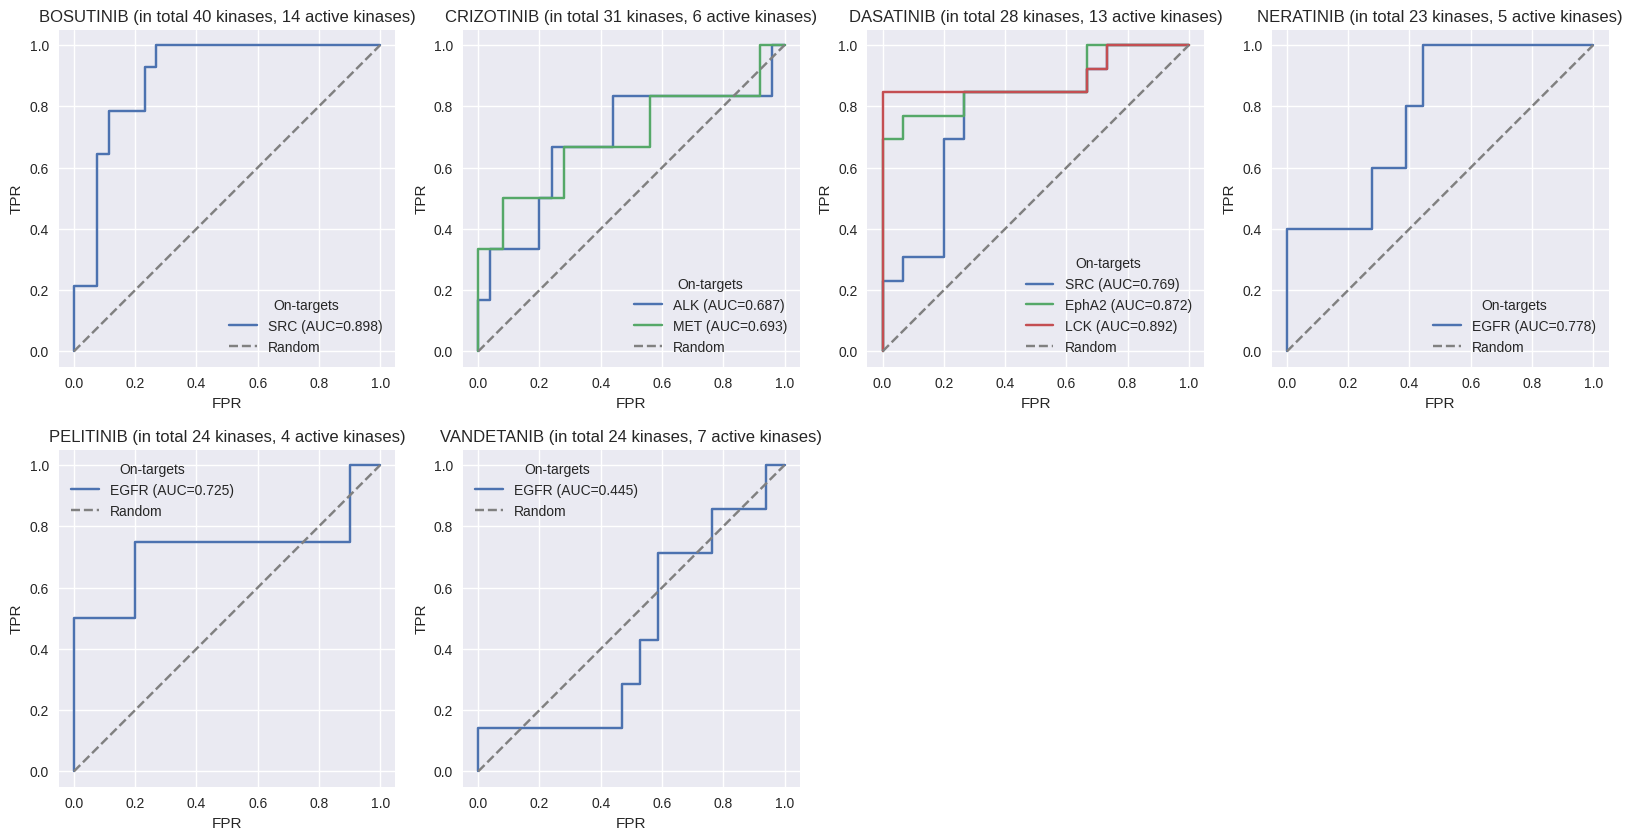

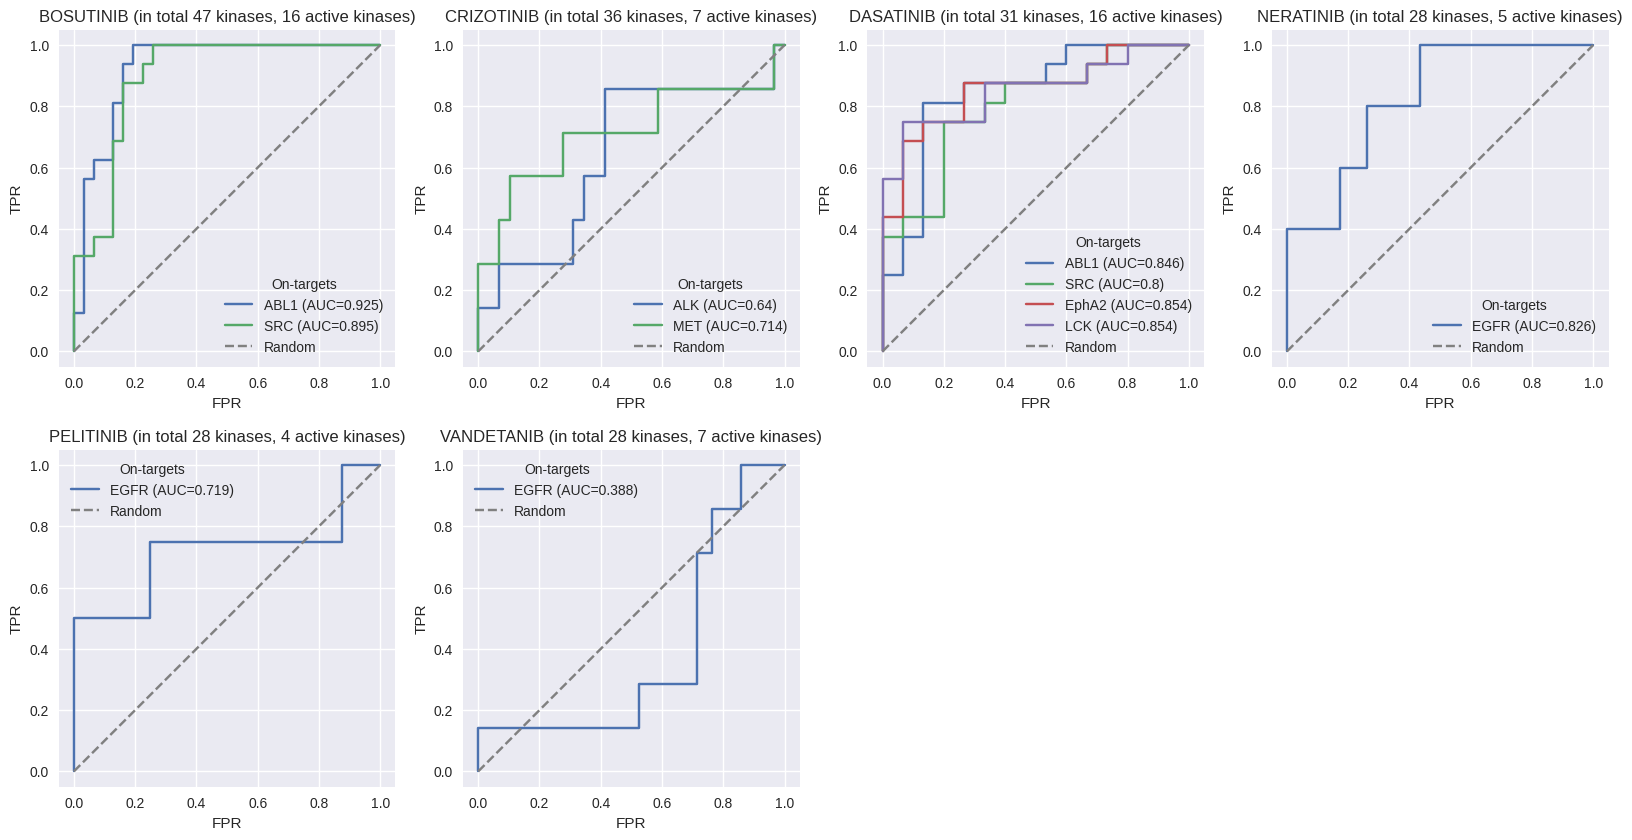

In [34]:
# Filter structures to get unique kinase structures with DFG-in and AC-in conformations
structures_apo_filtered_unique = (
    structures[(structures["ligand.expo_id"] == "-") & 
               (structures["ligand_allosteric.expo_id"] == "-") & 
               (structures["structure.dfg"] == "in") & 
               (structures["structure.ac_helix"] == "in")]
    .sort_values("structure.qualityscore", ascending=False)
    .drop_duplicates("kinase.klifs_name")
)

# Get the KLIFS IDs of these structures
klifs_ids_apo_filtered = structures_apo_filtered_unique["structure.klifs_id"].to_list()
print(len(klifs_ids_apo_filtered))
structures_apo_unfiltered_nonunique = (
    structures[(structures["ligand.expo_id"] == "-") & 
               (structures["ligand_allosteric.expo_id"] == "-") ]
)
klifs_id_apo_unfiltered_nonunique = structures_apo_unfiltered_nonunique["structure.klifs_id"].to_list()
print(len(klifs_id_apo_unfiltered_nonunique))

kinase_kinase_csv_apo_filtered = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_ids_apo_filtered)]
kinase_kinase_csv_apo_filtered = kinase_kinase_csv_apo_filtered[kinase_kinase_csv_apo_filtered["structure.2"].isin(klifs_ids_apo_filtered)]
kinase_kinase_csv_apo_filtered.to_csv("kinase_kinase_csv_apo_filtered.csv")

fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_apo_filtered.csv")
distance_matrix_apo_filtered = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_apo_filtered = Path("distance_matrix_apo_filtered.csv")
distance_matrix_apo_filtered.to_csv(distance_matrix_path_apo_filtered)
klifs_id_apo_unfiltered_nonunique = [int(i) for i in klifs_id_apo_unfiltered_nonunique]


kinase_kinase_csv_apo_unfiltered_nonunique = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_id_apo_unfiltered_nonunique)]
kinase_kinase_csv_apo_unfiltered_nonunique = kinase_kinase_csv_apo_unfiltered_nonunique[kinase_kinase_csv_apo_unfiltered_nonunique["structure.2"].isin(klifs_id_apo_unfiltered_nonunique)]
kinase_kinase_csv_apo_unfiltered_nonunique.to_csv("kinase_kinase_csv_apo_unfiltered_nonunique.csv")

fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_apo_unfiltered_nonunique.csv")
distance_matrix_apo_unfiltered_nonunique = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_apo_unfiltered_nonunique = Path("distance_matrix_apo_unfiltered_nonunique.csv")
distance_matrix_apo_unfiltered_nonunique.to_csv(distance_matrix_path_apo_unfiltered_nonunique)

# Kinase-ligand profiling dataset
profiling_df = data.profiling.load(
    ligand_profiling_method, pkidb_ligands=True, fda_approved=False
)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)
evaluator_apo_filtered_unique = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_apo_filtered,
)

evaluator_apo_unfiltered_nonunique = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_apo_unfiltered_nonunique,
)

distance_matrix_path_apo_filtered.unlink()  # Remove file again!
distance_matrix_path_apo_unfiltered_nonunique.unlink()  # Remove file again!
aucs_apo_filtered_unique = evaluator_apo_filtered_unique.plot_roc_curves()
plt.show()
aucs_apo_unfiltered_nonunique = evaluator_apo_unfiltered_nonunique.plot_roc_curves()
plt.show()



In [36]:
structures_apo_filtered_unique

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
1013,2569,4iz7,A,C,Human,239,Erk2,<NA>,<NA>,<NA>,SYIGEGAYGMVCSVAIKKIRTLREIKILLRFRENIIGINDIYIVQD...,-,-,0,0,<NA>,<NA>,in,in,1.80,9.8,0,2,0.791,2.101,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.192200,58.192200,80.146103,<NA>,False
1413,3459,4h36,A,A,Human,247,JNK3,<NA>,<NA>,<NA>,KPIGSGAQGIVCAVAIKKLRAYRELVLMKCVNKNIISLLNVYLVME...,-,-,0,0,<NA>,<NA>,in,in,3.00,9.8,0,2,0.819,2.192,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.393101,65.371696,43.797798,<NA>,False
2661,6619,5e8s,A,A,Human,521,TGFbR1,<NA>,<NA>,<NA>,ESIGKGRFGEVWRVAVKIFSWFREAEIYQTVMENILGFIAAWLVSD...,-,-,0,0,<NA>,<NA>,in,in,1.45,9.8,0,2,0.780,2.226,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.089500,54.539200,61.674900,<NA>,False
472,1393,2q0n,A,A,Human,370,PAK4,<NA>,<NA>,<NA>,IKIGEGSTGIVCIVAVKKMLLFNEVVIMRDYQENVVEMYNSWVVME...,-,-,0,0,<NA>,<NA>,in,in,1.75,9.7,0,3,0.777,2.123,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15.745300,52.091999,56.784100,<NA>,False
3676,10641,6bdl,A,A,Human,42,PKG1,<NA>,<NA>,<NA>,DTLGVGGFGRVELFAMKILHIRSEKQIMQGAHDFIVRLYRTYMLME...,-,-,0,0,<NA>,<NA>,in,in,1.96,9.7,0,3,0.782,2.093,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.983900,58.579102,53.994202,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,8672,5twu,-,B,Human,128,MELK,<NA>,<NA>,<NA>,ETIGT___AKVKLVAIKIMRIKTEIEALKNLRQHICQLYHVFMVLE...,-,-,0,0,<NA>,<NA>,in,in,2.60,6.8,3,0,0.778,1.984,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False
3245,9121,4ped,A,A,Human,70,ADCK3,<NA>,<NA>,<NA>,RPFAAASIGQVHLVA_KIQDYQREAACARKFRFYVPEIVDEVLTTE...,-,-,0,0,<NA>,<NA>,in,in,1.64,6.8,2,0,1.671,3.144,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,11.220500,37.318600,109.848999,<NA>,False
1378,3394,4hzr,A,A,Human,394,ACK,<NA>,<NA>,<NA>,EKLGDG___VVRRVAVKCLDFIREVNAMHSLDRNLIRLYGVKMVTE...,-,-,0,0,<NA>,<NA>,in,in,1.31,6.8,3,0,0.792,1.993,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False
1047,2630,2v62,A,B,Human,194,VRK2,<NA>,<NA>,<NA>,KKIG_____LIYLHVVKVEPLFSELKFYQRVALGIPLFYGSFMVME...,-,-,0,0,<NA>,<NA>,in,in,1.70,6.2,5,18,0.784,1.987,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False


105
340


           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

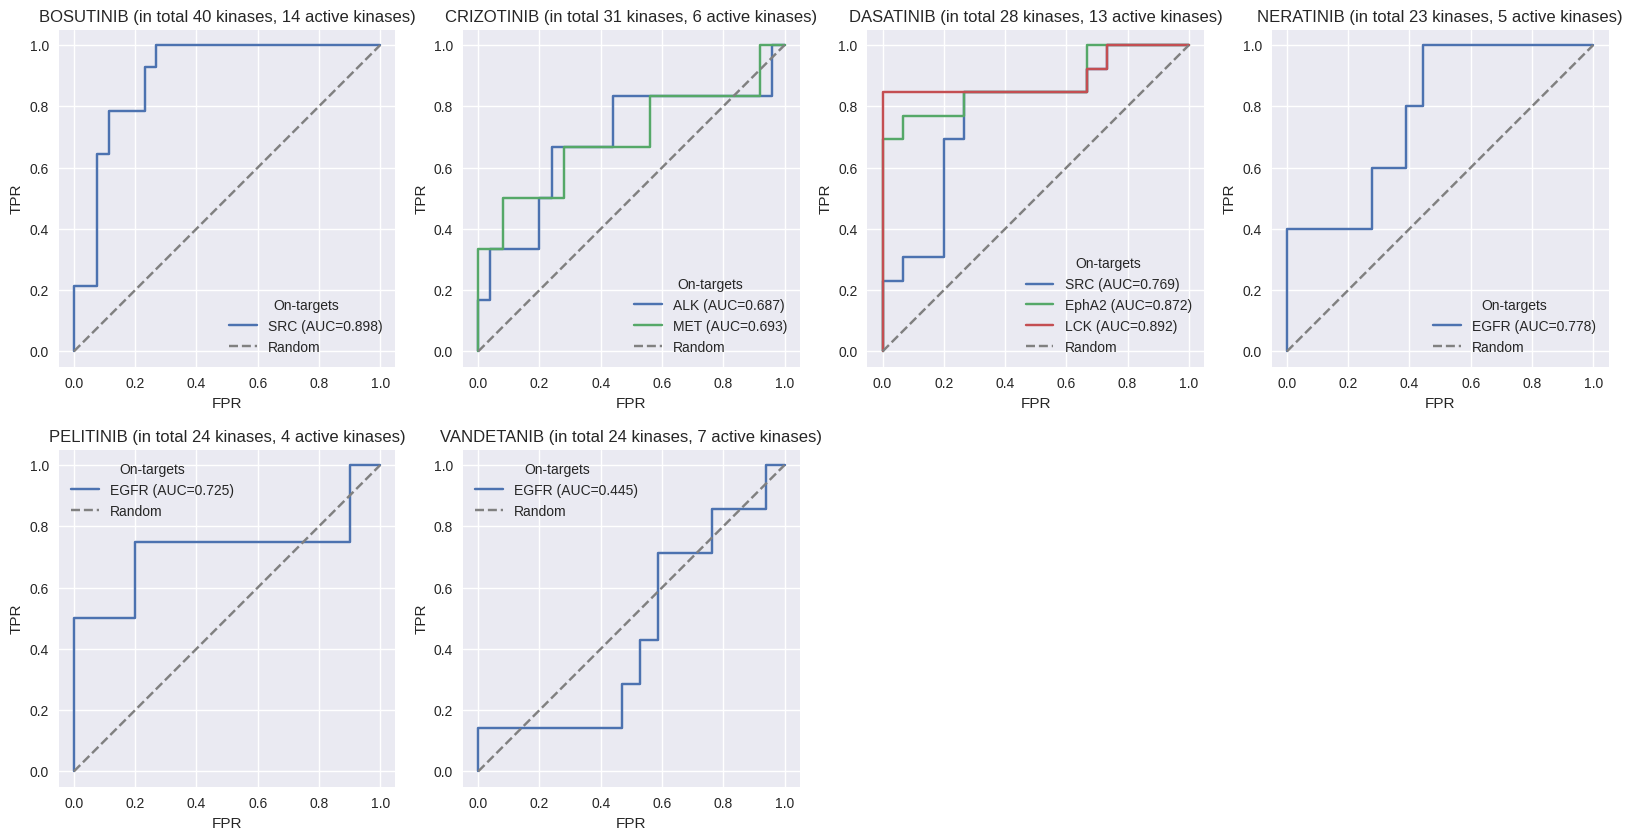

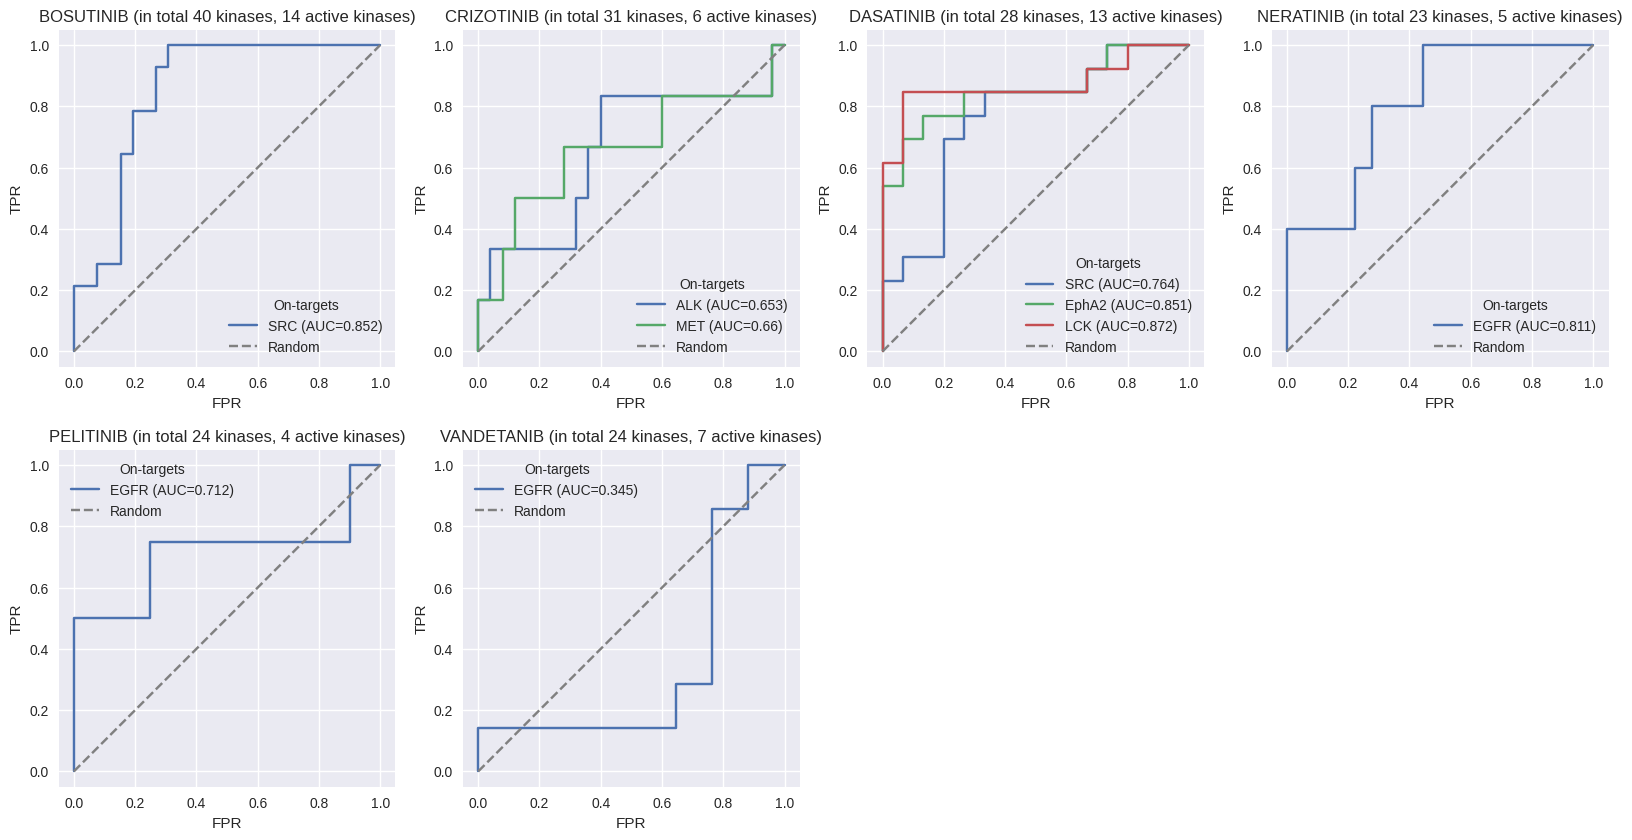

In [37]:
# Filter structures to get unique kinase structures with DFG-in and AC-in conformations
structures_apo_filtered_unique = (
    structures[(structures["ligand.expo_id"] == "-") & 
               (structures["ligand_allosteric.expo_id"] == "-") & 
               (structures["structure.dfg"] == "in") & 
               (structures["structure.ac_helix"] == "in")]
    .sort_values("structure.qualityscore", ascending=False)
    .drop_duplicates("kinase.klifs_name")
)
kinases_with_apo = structures_apo_filtered_unique['kinase.klifs_name'].to_list()
# Get the KLIFS IDs of these structures
klifs_ids_apo_filtered = structures_apo_filtered_unique["structure.klifs_id"].to_list()
print(len(klifs_ids_apo_filtered))
structures_all_filtered_nonunique = (
    structures[(structures["ligand.expo_id"] == "-") & 
               (structures["ligand_allosteric.expo_id"] == "-") & 
               (structures["structure.dfg"] == "in") & 
               (structures["structure.ac_helix"] == "in")]
)
klifs_id_all_filtered_nonunique = structures_all_filtered_nonunique["structure.klifs_id"].to_list()
print(len(klifs_id_all_filtered_nonunique))

kinase_kinase_csv_apo_filtered = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_ids_apo_filtered)]
kinase_kinase_csv_apo_filtered = kinase_kinase_csv_apo_filtered[kinase_kinase_csv_apo_filtered["structure.2"].isin(klifs_ids_apo_filtered)]
kinase_kinase_csv_apo_filtered.to_csv("kinase_kinase_csv_apo_filtered.csv")

fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_apo_filtered.csv")
distance_matrix_apo_filtered = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_apo_filtered = Path("distance_matrix_apo_filtered.csv")
distance_matrix_apo_filtered.to_csv(distance_matrix_path_apo_filtered)
klifs_id_all_filtered_nonunique = [int(i) for i in klifs_id_all_filtered_nonunique]


kinase_kinase_csv_all_filtered_nonunique = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_id_all_filtered_nonunique)]
kinase_kinase_csv_all_filtered_nonunique = kinase_kinase_csv_all_filtered_nonunique[kinase_kinase_csv_all_filtered_nonunique["structure.2"].isin(klifs_id_all_filtered_nonunique)]
kinase_kinase_csv_all_filtered_nonunique.to_csv("kinase_kinase_csv_all_filtered_nonunique.csv")

fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_all_filtered_nonunique.csv")
distance_matrix_all_filtered_nonunique = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_all_filtered_nonunique = Path("distance_matrix_all_filtered_nonunique.csv")
distance_matrix_all_filtered_nonunique.to_csv(distance_matrix_path_all_filtered_nonunique)

# Kinase-ligand profiling dataset
profiling_df = data.profiling.load(
    ligand_profiling_method, pkidb_ligands=True, fda_approved=False
)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)
evaluator_apo_filtered_unique = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_apo_filtered,
)

evaluator_all_filtered_nonunique = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_all_filtered_nonunique,
)

distance_matrix_path_apo_filtered.unlink()  # Remove file again!
distance_matrix_path_all_filtered_nonunique.unlink()  # Remove file again!

aucs_apo_filtered_unique = evaluator_apo_filtered_unique.plot_roc_curves()
plt.show()

aucs_all_filtered_nonunique = evaluator_all_filtered_nonunique.plot_roc_curves()
plt.show()


           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

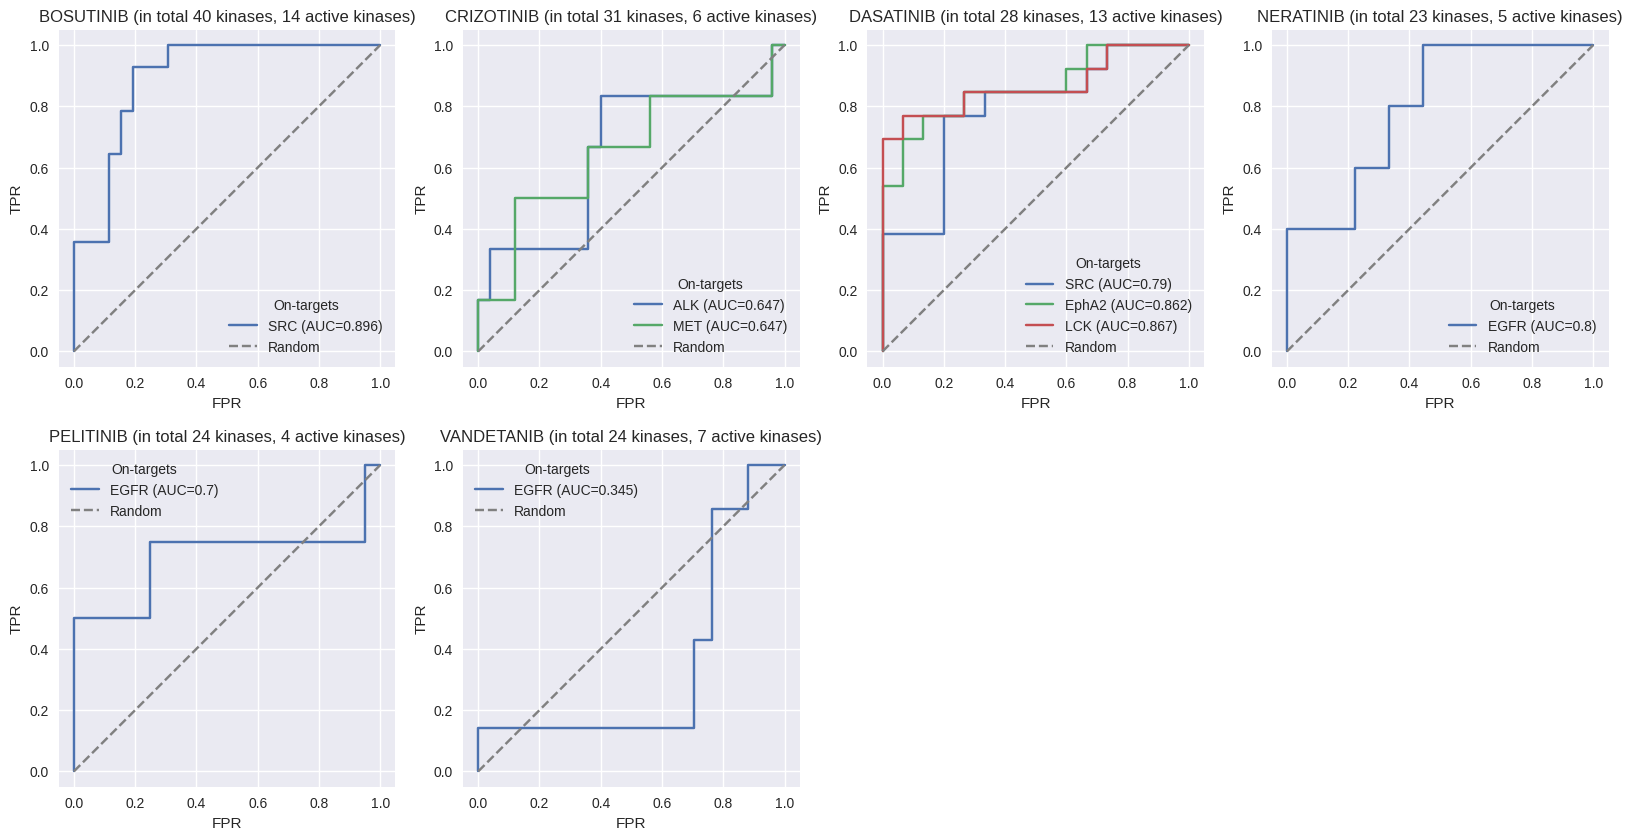

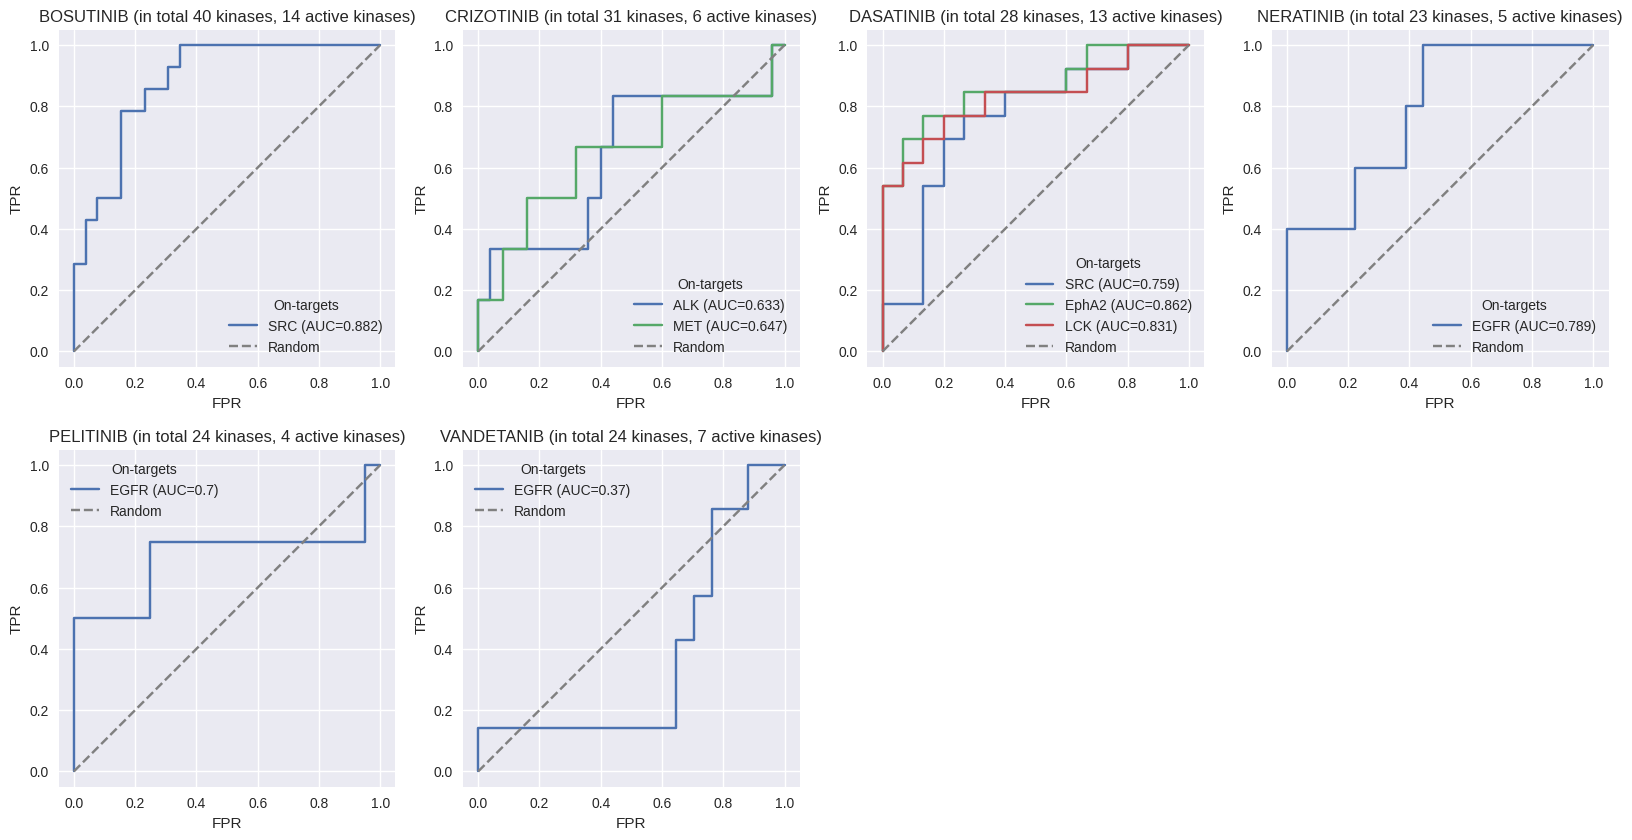

In [43]:

structures_apo_filtered_nonunique = (
    structures[(structures["ligand.expo_id"] == "-") & 
               (structures["ligand_allosteric.expo_id"] == "-") & 
               (structures["structure.dfg"] == "in") & 
               (structures["structure.ac_helix"] == "in")]
)
klifs_id_apo_filtered_nonunique = structures_apo_filtered_nonunique["structure.klifs_id"].to_list()
kinase_names_apo = structures_apo_filtered_nonunique['kinase.klifs_name'].tolist()
kinase_kinase_csv_apo_filtered_nonunique = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_id_apo_filtered_nonunique)]
kinase_kinase_csv_apo_filtered_nonunique = kinase_kinase_csv_all_filtered_nonunique[kinase_kinase_csv_all_filtered_nonunique["structure.2"].isin(klifs_id_apo_filtered_nonunique)]
kinase_kinase_csv_apo_filtered_nonunique.to_csv("kinase_kinase_csv_apo_filtered_nonunique.csv")

fingerprint_distance_generator_apo_filtered_nonunique = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_apo_filtered_nonunique.csv")
distance_matrix_apo_filtered_nonunique = fingerprint_distance_generator_apo_filtered_nonunique.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_apo_filtered_nonunique = Path("distance_matrix_apo_filtered_nonunique.csv")
distance_matrix_apo_filtered_nonunique.to_csv(distance_matrix_path_apo_filtered_nonunique)
##########################################################################################

structures_all_filtered_nonunique = (
    structures[(structures["structure.dfg"] == "in") & 
               (structures["structure.ac_helix"] == "in")]
)
structures_all_filtered_nonunique = structures_all_filtered_nonunique[structures_all_filtered_nonunique['kinase.klifs_name'].isin(kinase_names_apo)]

klifs_id_all_filtered_nonunique = structures_all_filtered_nonunique["structure.klifs_id"].to_list()

kinase_kinase_csv_all_filtered_nonunique = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_id_all_filtered_nonunique)]
kinase_kinase_csv_all_filtered_nonunique = kinase_kinase_csv_all_filtered_nonunique[kinase_kinase_csv_all_filtered_nonunique["structure.2"].isin(klifs_id_all_filtered_nonunique)]
kinase_kinase_csv_all_filtered_nonunique.to_csv("kinase_kinase_csv_all_filtered_nonunique.csv")

fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_all_filtered_nonunique.csv")
distance_matrix_all_filtered_nonunique = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path_all_filtered_nonunique = Path("distance_matrix_all_filtered_nonunique.csv")
distance_matrix_all_filtered_nonunique.to_csv(distance_matrix_path_all_filtered_nonunique)


profiling_df = data.profiling.load(
    ligand_profiling_method, pkidb_ligands=True, fda_approved=False
)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)

evaluator_apo_filtered_nonunique = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_apo_filtered_nonunique,
)

evaluator_all_filtered_nonunique = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path_all_filtered_nonunique,
)



distance_matrix_path_apo_filtered_nonunique.unlink()  # Remove file again!
distance_matrix_path_all_filtered_nonunique.unlink()


aucs_apo_filtered_nonunique = evaluator_apo_filtered_nonunique.plot_roc_curves()
plt.show()


aucs_all_filtered_nonunique = evaluator_all_filtered_nonunique.plot_roc_curves()
plt.show()

           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

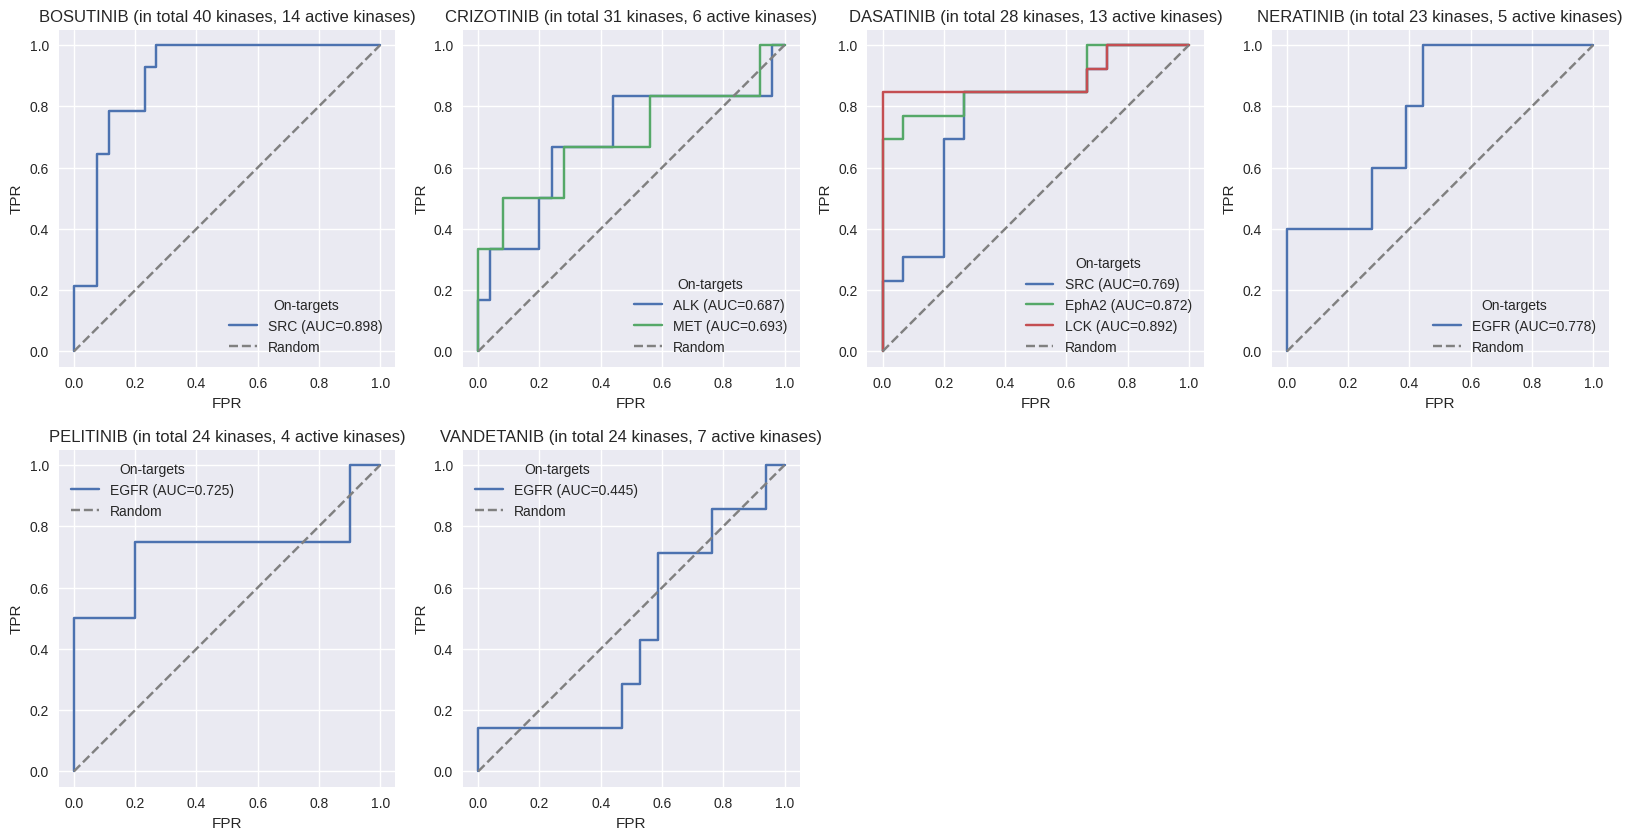

{'Bosutinib-SRC': 0.8983516483516484,
 'Crizotinib-ALK': 0.6866666666666668,
 'Crizotinib-MET': 0.6933333333333332,
 'Dasatinib-SRC': 0.7692307692307693,
 'Dasatinib-EphA2': 0.8717948717948718,
 'Dasatinib-LCK': 0.8923076923076924,
 'Neratinib-EGFR': 0.7777777777777778,
 'Pelitinib-EGFR': 0.7249999999999999,
 'Vandetanib-EGFR': 0.4453781512605042}

In [53]:
def create_distance_matrix(structures, kinase_kinase_path, name, apo_only=False, dfg_in_only=True, ac_in_only=True, unique_structures=True):
    if apo_only:
        structures_filtered = structures[(structures["ligand.expo_id"] == "-") & 
                   (structures["ligand_allosteric.expo_id"] == "-")]
    else:
        structures_apo = structures[(structures["ligand.expo_id"] == "-") & 
                   (structures["ligand_allosteric.expo_id"] == "-")]
        structures_apo_names = structures_apo["kinase.klifs_name"].to_list()
        structures_filtered = structures[structures["kinase.klifs_name"].isin(structures_apo_names)]
    if dfg_in_only:
        structures_filtered = structures_filtered[structures_filtered["structure.dfg"] == "in"]
    if ac_in_only:
        structures_filtered = structures_filtered[structures_filtered["structure.ac_helix"] == "in"]
    if unique_structures:
        structures_filtered = structures_filtered.sort_values("structure.qualityscore", ascending=False).drop_duplicates("kinase.klifs_name")

    # Get the KLIFS IDs of these structures
    klifs_ids_filtered = structures_filtered["structure.klifs_id"].to_list()

    kinase_kinase_csv = pd.read_csv(kinase_kinase_path)
    kinase_kinase_csv_filtered = kinase_kinase_csv[kinase_kinase_csv["structure.1"].isin(klifs_ids_filtered)]
    kinase_kinase_csv_filtered = kinase_kinase_csv_filtered[kinase_kinase_csv_filtered["structure.2"].isin(klifs_ids_filtered)]
    kinase_kinase_csv_filtered.to_csv("kinase_kinase_csv_filtered.csv")

    fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv("kinase_kinase_csv_filtered.csv")
    distance_matrix = fingerprint_distance_generator.kinase_distance_matrix(
        by="minimum", coverage_min=0.8
    )
    distance_matrix_path = Path(name + '.csv')
    distance_matrix.to_csv(distance_matrix_path)
    
    return distance_matrix_path


def set_up_profiling_general():
    profiling_df = data.profiling.load(
        ligand_profiling_method, pkidb_ligands=True, fda_approved=False
    )

    ligand_names = profiling_df.columns
    ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
    ligand_kinase_pairs = (
        ligand_targets[["ligand.input", "targets.kinmap"]]
        .explode("targets.kinmap")
        .to_numpy()
        .tolist()
    )
    return ligand_kinase_pairs


def set_up_evaluator(ligand_kinase_pairs, kinase_kinase_path):
    evaluator = LigandVsKinaseEvaluator(
        ligand_kinase_pairs,
        ligand_profiling_method,
        KINASE_DISTANCES_METHOD,
        KINASE_ACTIVITY_CUTOFF,
        KINASE_ACTIVITY_MAX,
        MIN_N_SHARED_KINASES,
        MIN_N_SHARED_ACTIVE_KINASES,
        kinase_kinase_path=kinase_kinase_path,
    )
    return evaluator


def plot_roc_curves(evaluator):
    aucs = evaluator.plot_roc_curves()
    plt.show()
    return aucs


def workflow(structures, kinase_kinase_path, name, apo_only=False, dfg_in_only=True, ac_in_only=True, unique_structures=True):
    distance_matrix_path = create_distance_matrix(structures, kinase_kinase_path, name, apo_only, dfg_in_only, ac_in_only, unique_structures)
    ligand_kinase_pairs = set_up_profiling_general()
    evaluator = set_up_evaluator(ligand_kinase_pairs, distance_matrix_path)
    aucs = plot_roc_curves(evaluator)
    
    # Clean up the distance matrix file
    distance_matrix_path.unlink()
    
    return aucs

# Execute workflow
workflow(structures=structures, kinase_kinase_path=KINASE_KINASE_PATH, name="apo_filtered_dfg_in_ac_in", apo_only=True, dfg_in_only=True, ac_in_only=True, unique_structures=True)


## idea: matrix with only same ligand

so we did analysis with only apo structures. problem is not all kinases have apo structures, meaning we can only do cross-comparison with some. however, perhaps some have other ligands in common (e.g. ADP). Therefore, I would like to make a matrix: all kinases against all kinases (rows/columns), with in the cells the ligand(s) that they have in common. 

In [32]:
structures
# so we did analysis with only apo structures. problem is not all kinases have apo structures, meaning we can only do cross-comparison with some. however, perhaps some have other ligands in common (e.g. ADP). Therefore, I would like to make a matrix: all kinases against all kinases (rows/columns), with in the cells the ligand(s) that they have in common. 
# first, get all unique kinases
kinase_names = structures["kinase.klifs_name"].unique()

#then, for each kinase, get the ligands that they have in common with all other kinases
kinase_ligands = {}
for kinase in kinase_names:
    ligands = structures[structures["kinase.klifs_name"] == kinase]["ligand.expo_id"].unique()
    kinase_ligands[kinase] = ligands
    print(kinase, ligands)

#now, create a matrix with all kinases on the rows and columns, and in the cells the ligands that they have in common
import numpy as np
import pandas as pd
kinase_names = list(kinase_ligands.keys())
matrix = np.zeros((len(kinase_names), len(kinase_names)), dtype=object)
for i, kinase1 in enumerate(kinase_names):
    for j, kinase2 in enumerate(kinase_names):
        ligands1 = kinase_ligands[kinase1]
        ligands2 = kinase_ligands[kinase2]
        common_ligands = set(ligands1).intersection(ligands2)
        matrix[i,j] = common_ligands
matrix_df = pd.DataFrame(matrix, index=kinase_names, columns=kinase_names)
matrix_df.to_csv("kinase_ligand_matrix.csv")
matrix_df

EphA7 <StringArray>
['IHZ', '-']
Length: 2, dtype: string
ITK <StringArray>
['B49', 'M0Y', 'PQC', '29Y', 'IAQ',   '-', 'ADP', '13J', '477', '2VT', '2W6',
 '0G2', '18R', 'M0Z', 'G7K', 'L7O', '0G1', 'QWS', 'MJG', '3P6', 'STU', 'G6K',
 '0F2', '13L']
Length: 24, dtype: string
PYK2 <StringArray>
['4JZ', '3JZ', 'AGS', '0YJ', '349', '0YH', '-', 'B96', 'P1E', '7FM', 'YAM']
Length: 11, dtype: string
TRKC <StringArray>
['0F4', '4EJ', 'DZC', 'DZ6']
Length: 4, dtype: string
CLK1 <StringArray>
['V25', 'DBQ', '6FB', '6FD', 'SQZ', '5ID', 'E6T', 'E6W', 'EAQ', 'H3Q', 'H3H',
 'H3E', 'H3N', 'HQB', 'FG9', 'JWN', '3NG', 'JQW', 'JU8', 'JTQ', 'Q7K', 'PQ5',
 '7A7', 'KHC', 'EAE', 'PKB', 'IYZ', 'JUW', 'RH8', '06N']
Length: 30, dtype: string
MSK1 <StringArray>
['-']
Length: 1, dtype: string
ABL2 <StringArray>
['VX6', 'DKI', 'STI']
Length: 3, dtype: string
SRPK1 <StringArray>
['ADP', '-', 'RXZ', 'W4A', '3UL', 'ANP', 'EMH']
Length: 7, dtype: string
AMPKa1 <StringArray>
['-', 'STU']
Length: 2, dtype: string
TTN <St

,EphA7,ITK,PYK2,TRKC,CLK1,MSK1,ABL2,SRPK1,AMPKa1,TTN,RSK2,PAK1,AMPKa2,ROS,PAK5,Wee1,FAK,MARK1,MER,IKKb,NEK2,GAK,EphB4,DAPK3,Erk5,...,PKG1,NDR1,ULK3,CLK4,RIOK2,DDR2,HPK1,TAO3,RSK4,AurC,ULK2,HIPK2,ULK4,CaMK1d,RYK,ROR1,TTBK2,CCK4,IRAK3,CDK7,KSR2,KSR1,FRAP,LMR3,ATM
EphA7,"{IHZ, -}",{-},{-},{},{},{-},{},{-},{-},{-},{},{-},{-},{},{},{},{},{-},{-},{},{-},{-},{-},{-},{-},...,{-},{},{},{},{-},{},{-},{},{},{},{},{},{},{-},{-},{},{},{-},{-},{},{},{},{},{-},{}
ITK,{-},"{IAQ, MJG, 13J, 0G1, L7O, 0F2, PQC, G7K, 29Y, ...",{-},{},{},{-},{},"{-, ADP}","{-, STU}",{-},{},{-},"{-, STU}",{},{},{},{ADP},{-},"{-, ADP}",{},{-},{-},"{-, STU}",{-},{-},...,{-},{},{},{},{-},{},"{-, B49}",{ADP},{},{},{},{},{},{-},{-},{},{ADP},{-},{-},{},{},{},{},{-},{}
PYK2,{-},{-},"{4JZ, 349, P1E, -, 0YJ, 3JZ, B96, 0YH, AGS, 7F...",{},{},{-},{},{-},{-},{-},{},{-},{-},{},{},{},"{P1E, YAM}",{-},{-},{},"{AGS, -}",{-},{-},{-},{-},...,{-},{},{},{},{-},{},{-},{},{},{},{},{},{AGS},{-},{-},{},{},{-},"{AGS, -}",{AGS},{},{},{AGS},{-},{AGS}
TRKC,{},{},{},"{DZ6, DZC, 4EJ, 0F4}",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
CLK1,{},{},{},{},"{H3Q, H3E, IYZ, EAQ, 06N, JU8, E6W, 6FD, Q7K, ...",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},...,{},{},{},{3NG},{},{},{},{},{},{},{},{3NG},{},{},{},{},{},{},{},{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KSR2,{},{},{},{},{},{},{},{ANP},{},{},{},{ANP},{},{},{},{},{},{},{ANP},{},{},{},{},{},{ANP},...,{ANP},{ANP},{},{},{ANP},{},{ANP},{},{ANP},{},{},{},{},{},{},{},{},{},{},{},{ANP},{ANP},{},{},{}
KSR1,{},{},{},{},{},{},{},{ANP},{},{},{},{ANP},{},{},{},{},{},{},{ANP},{},{},{},{},{},{ANP},...,{ANP},{ANP},{},{},{ANP},{},{ANP},{},{ANP},{},{},{},{},{},{},{},{},{},{},{},{ANP},{ANP},{},{},{}
FRAP,{},{},{AGS},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{AGS},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{},{},{},{AGS},{},{},{},{},{},{AGS},{AGS},{},{},{AGS},{},{AGS}
LMR3,{-},{-},{-},{},{},{-},{},{-},{-},{-},{},{-},{-},{},{},{},{},{-},{-},{},{-},{-},{-},{-},{-},...,{-},{},{},{},{-},{},{-},{},{},{},{},{},{},{-},{-},{},{},{-},{-},{},{},{},{},{-},{}


In [50]:
#print out number of empty cells vs non-empty cells
empty_cells = 0
non_empty_cells = 0
for i, kinase1 in enumerate(kinase_names):
    for j, kinase2 in enumerate(kinase_names):
        if matrix[i,j] == set():
            empty_cells += 1
        else:
            non_empty_cells += 1
print(empty_cells, non_empty_cells)
#and in percentages
total_cells = empty_cells + non_empty_cells
empty_cells_percentage = empty_cells / total_cells * 100
non_empty_cells_percentage = non_empty_cells / total_cells * 100
print(empty_cells_percentage, non_empty_cells_percentage)

51730 26111
66.45598078133631 33.544019218663685


array([[{'IHZ', '-'}, {'-'}, {'-'}, ..., set(), {'-'}, set()],
       [{'-'},
        {'IAQ', 'MJG', '13J', '0G1', 'L7O', '0F2', 'PQC', 'G7K', '29Y', 'M0Z', 'ADP', 'QWS', '477', 'M0Y', '13L', 'B49', '-', '2VT', 'G6K', '18R', '3P6', '2W6', 'STU', '0G2'},
        {'-'}, ..., set(), {'-'}, set()],
       [{'-'}, {'-'},
        {'4JZ', '349', 'P1E', '-', '0YJ', '3JZ', 'B96', '0YH', 'AGS', '7FM', 'YAM'},
        ..., {'AGS'}, {'-'}, {'AGS'}],
       ...,
       [set(), set(), {'AGS'}, ..., {'AGS'}, set(), {'AGS'}],
       [{'-'}, {'-'}, {'-'}, ..., set(), {'-'}, set()],
       [set(), set(), {'AGS'}, ..., {'AGS'}, set(),
        {'AGS', 'UGK', 'UF8'}]], dtype=object)

In [37]:
#for visual purposes, make a heatmap of this, colored by number of common ligands
#first make matrix with len of common ligands
matrix_lens = np.zeros((len(kinase_names), len(kinase_names)), dtype=int)
for i, kinase1 in enumerate(kinase_names):
    for j, kinase2 in enumerate(kinase_names):
        matrix_lens[i,j] = len(matrix[i,j])
matrix_lens_df = pd.DataFrame(matrix_lens, index=kinase_names, columns=kinase_names)
matrix_lens_df.to_csv("kinase_ligand_matrix_lens.csv")

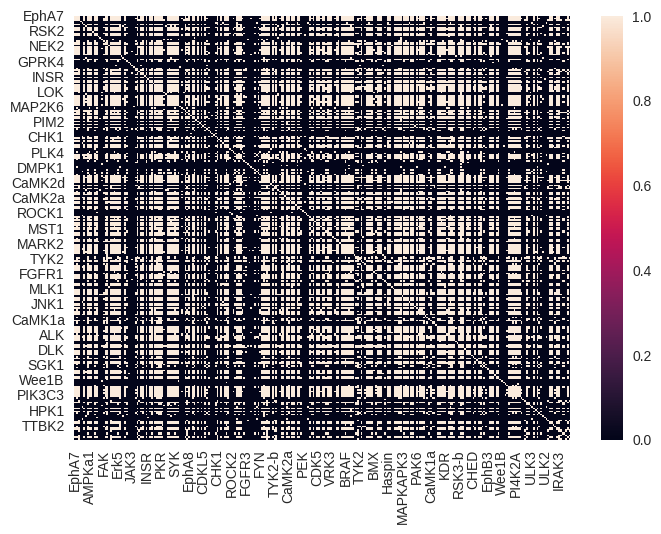

In [49]:
matrix_lens_df
#convert to categorical binary: zero or not zero
matrix_lens_df_cat = matrix_lens_df.copy()
matrix_lens_df_cat[matrix_lens_df_cat > 0] = 1
matrix_lens_df_cat.to_csv("kinase_ligand_matrix_lens_cat.csv")

#plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix_lens_df_cat,annot=False,fmt="d")
plt.show()

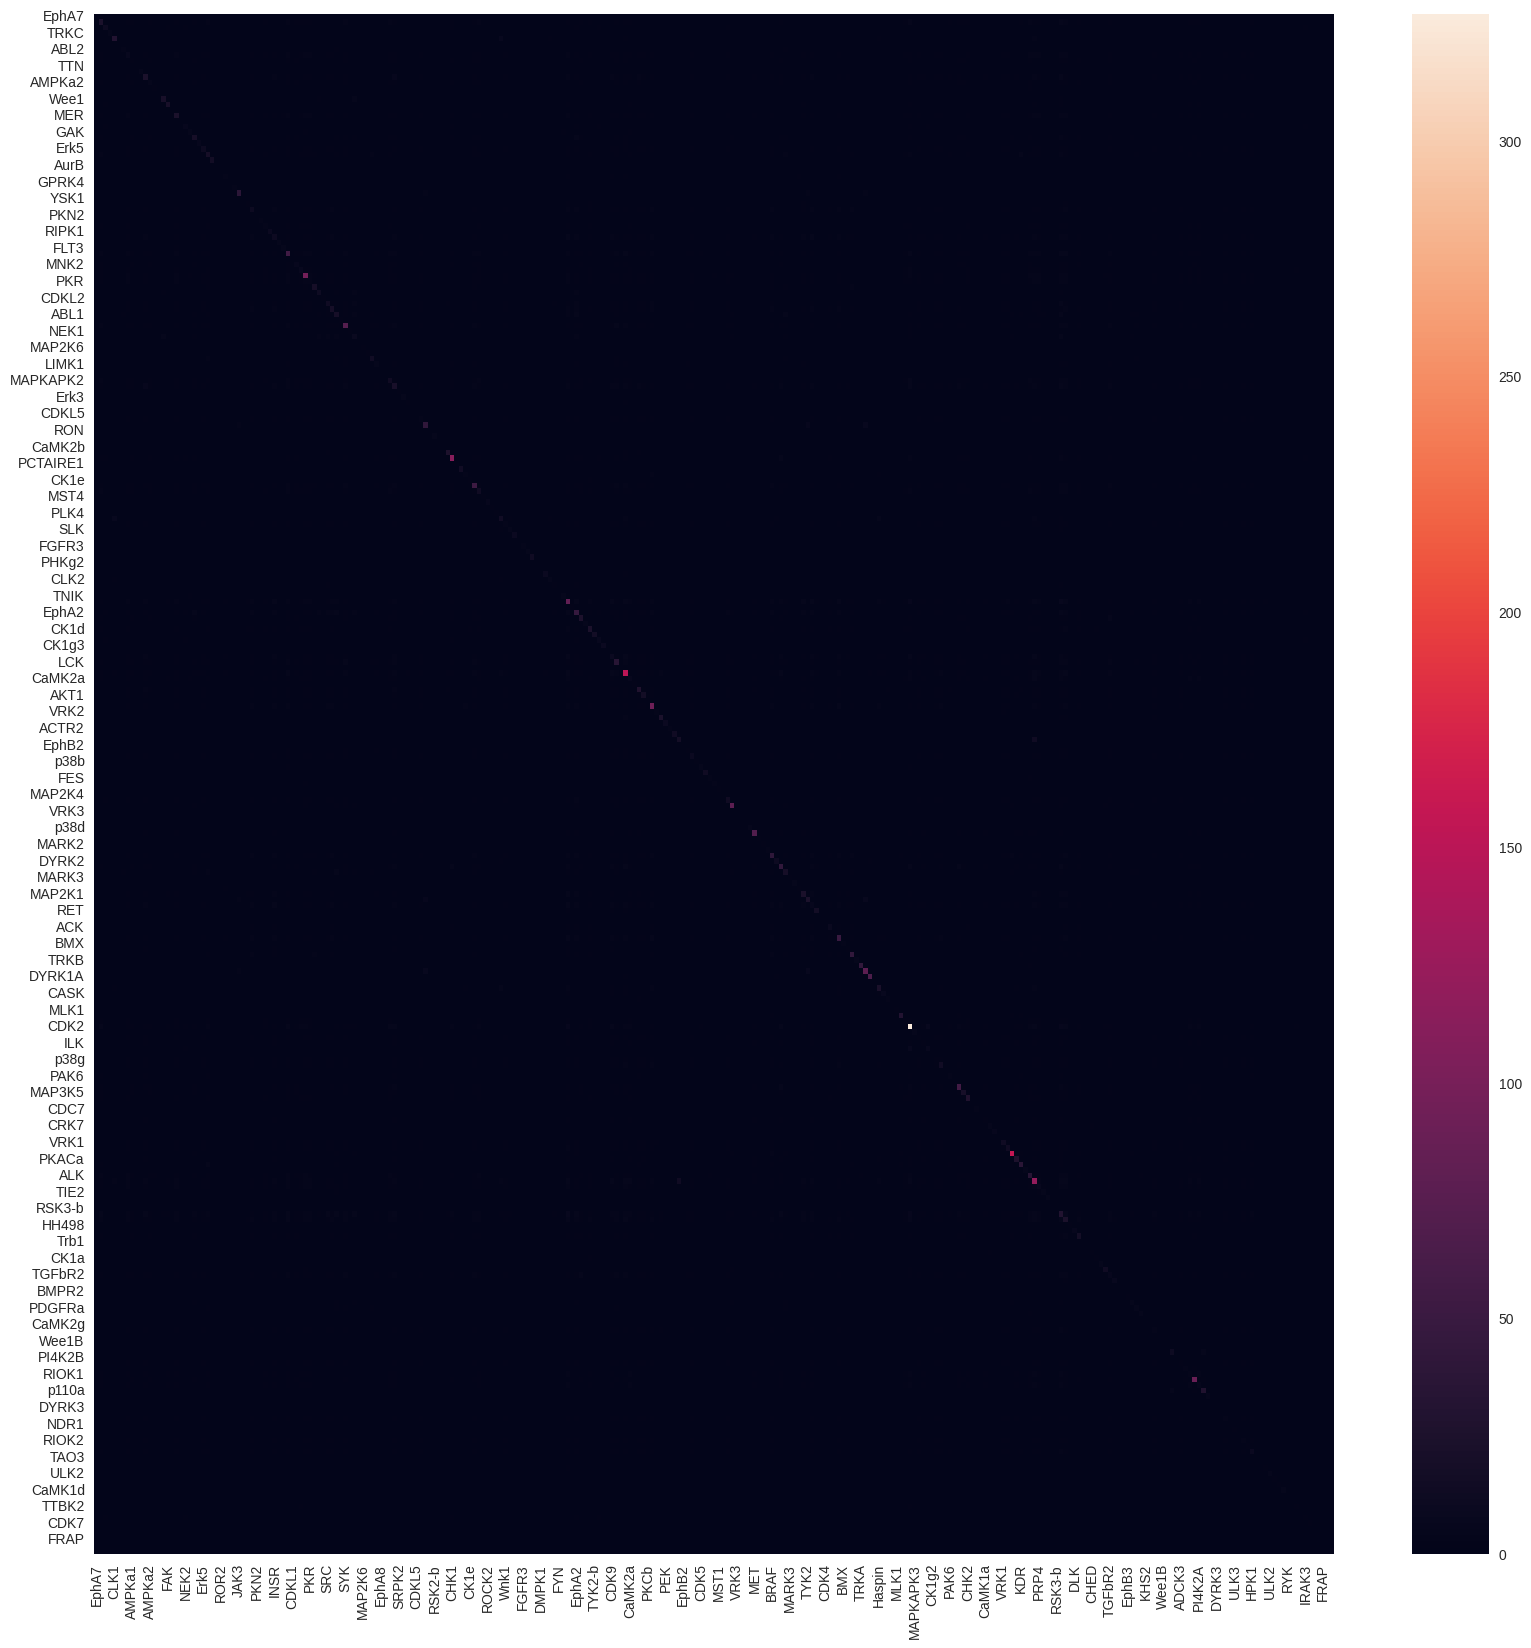

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(matrix_lens_df, annot=False, fmt="d")
plt.show()
